<a href="https://colab.research.google.com/github/plinder-org/moving_beyond_memorisation/blob/main/notebooks/plinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please run only the first cell, wait for the kernel to restart, and then continue with the second cell

In [1]:
!pip install -q git+https://github.com/conda-incubator/condacolab.git@0.1.x
import condacolab
condacolab.install()

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
‚è¨ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:10
üîÅ Restarting kernel...


In [2]:
!mamba install -q pip scipy networkx conda-forge::boost aivant::openstructure anaconda::py-boost plip
!pip install -q networkit tabulate
!pip install -q pdb-validation@git+https://git.scicore.unibas.ch/schwede/ligand-validation.git
!pip install -q mmpdb@git+https://github.com/rdkit/mmpdb.git
!pip install -q plinder@git+https://github.com/plinder-org/plinder@revamp_loader
!pip install -q py3Dmol

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.7/13.7 MB 86.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 89.9/89.9 kB 446.0 kB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 617.5/617.5 kB 15.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.1/13.1 MB 94.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 229.9/229.9 kB 14.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

# Downloading the dataset

The default location for the dataset is `~/.local/share/pinder/<PLINDER_RELEASE>/<PLINDER_ITERATION>` where:
- `<PLINDER_RELEASE>` is the date of the PDB sync used to generate the dataset (e.g 2024-06)
- `<PLINDER_ITERATION>` is the iteration of the source code that generated the dataset (e.g. `v2`)

If you want to use a different location, you can do so by setting the `PLINDER_MOUNT` environment variable. For example, in the Google Colab context we could set it to "/content" so that we can see the files in the file browser.


In [2]:
%env PLINDER_LOG_LEVEL=0
%env PLINDER_MOUNT=/content

env: PLINDER_LOG_LEVEL=0
env: PLINDER_MOUNT=/content



### Use `plinder_download` to download the complete dataset

```bash
plinder_download --help
usage:
    Download the full plinder dataset for the current configuration.
    Note that even though this is wrapped in a progress bar, the estimated
    completion time can vary wildly as it iterates over larger files vs.
    smaller ones.
    

optional arguments:
  -h, --help            show this help message and exit
  --release RELEASE     plinder release
  --iteration ITERATION
                        plinder iteration
  -y, --yes             skip confirmation
```

**NOTE: _This will take around an hour to complete and downloads around 1TB of data_**.

But after this is done you can set the `PLINDER_OFFLINE` environment variable to `true` to avoid downloading the data again.

### Use the `plinder` Python package to lazily access the dataset

Alternatively, if the `PLINDER_OFFLINE` environment variable is set to `false` (which is the default), the dataset will be downloaded on lazily and on the fly as you access the data. This is preferred for exploration and prototyping as you don't need to download the entire dataset at once and can just work with the assets you need for your use-case.

In [3]:
import plinder.core.utils.config

cfg = plinder.core.get_config()
print(f"local directory: {cfg.data.plinder_dir}")
print(f"remote data directory: {cfg.data.plinder_remote}")

/usr/local/lib/python3.10/dist-packages/google/cloud/storage/transfer_manager.py:30: UserWarning: The module `transfer_manager` is a preview feature. Functionality and API may change. This warning will be removed in a future release.
  warnings.warn(


local directory: /content/plinder/2024-06/v2
remote data directory: gs://plinder/2024-06/v2


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol

# The PLINDEX


## Querying and filtering the index

Your main entry point to the dataset is the annotations table or the **index**, which is a Parquet file containing all the annotations for each system in the dataset.

**NOTE: _The entire file has 745 columns, >1.3M rows, and takes 24G of RAM to load into memory_**

We provide a `query_index` function to access the index and filter it based on the columns and criteria you need.

In [5]:
from plinder.core.scores import query_index

The core of the PLINDER dataset is a collection of Protein-Ligand Interaction (PLI) systems extracted from the Protein Data Bank (PDB). The curation process in a nutshell is as follows:

1. For every PDB entry, we generate all available biological assemblies (biounits).
2. For each biounit, we identify all ligands and all protein chains within 6 √Ö of any ligand.
3. Ligands within 4 √Ö of each other are merged into a single PLI system.
4. For each system, we provide a range of detailed annotations and files to facilitate in-depth analysis and to enable a variety of use-cases.

Thus, a PLI **_system_** is defined as a collection of **_protein_** and **_ligand_** chains that are in close proximity to each other within a given **_biounit_** of a given PDB **_entry_**. The **_pocket_** of a system is defined as the set of protein residues within 6 √Ö of the ligands in the system.

Let's look at all the columns that define a `system`:

In [6]:
plindex = query_index(
    columns=[
        "system_id",
        "entry_pdb_id",
        "system_biounit_id",
        "system_protein_chains_asym_id",
        "system_ligand_chains_asym_id",
        "ligand_instance_chain",
    ]
)
plindex.head(20)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

system_id entry_pdb_id system_biounit_id  \
0       3grt__1__1.A_2.A__1.B         3grt                 1   
1       3grt__1__1.A_2.A__1.C         3grt                 1   
2       3grt__1__1.A_2.A__2.B         3grt                 1   
3       3grt__1__1.A_2.A__2.C         3grt                 1   
4           1grx__1__1.A__1.B         1grx                 1   
5           6grf__1__1.A__1.D         6grf                 1   
6           6grf__2__1.B__1.E         6grf                 2   
7   3grj__2__1.B__1.I_1.L_1.Q         3grj                 2   
8   3grj__2__1.B__1.I_1.L_1.Q         3grj                 2   
9   3grj__2__1.B__1.I_1.L_1.Q         3grj                 2   
10          3grj__1__1.A__1.F         3grj                 1   
11          3grj__1__1.A__1.H         3grj                 1   
12          8grn__1__1.A__1.C         8grn                 1   
13          8grn__1__1.B__1.D         8grn                 1   
14      4grc__1__1.A__1.C_1.D         4grc                 1   
15      4grc__1__1.A__1.C_1.D         4grc                 1   
16      4grc__1__2.A__2.C_2.D         4grc                 1   
17      4grc__1__2.A__2.C_2.D         4grc                 1   
18      4grr__1__1.B_1.C__1.K         4grr                 1   
19      2grt__1__1.A_2.A__1.B         2grt                 1   

   system_protein_chains_asym_id system_ligand_chains_asym_id  \
0                     [1.A, 2.A]                        [1.B]   
1                     [1.A, 2.A]                        [1.C]   
2                     [1.A, 2.A]                        [2.B]   
3                     [1.A, 2.A]                        [2.C]   
4                          [1.A]                        [1.B]   
5                          [1.A]                        [1.D]   
6                          [1.B]                        [1.E]   
7                          [1.B]              [1.I, 1.L, 1.Q]   
8                          [1.B]              [1.I, 1.L, 1.Q]   
9                          [1.B]              [1.I, 1.L, 1.Q]   
10                         [1.A]                        [1.F]   
11                         [1.A]                        [1.H]   
12                         [1.A]                        [1.C]   
13                         [1.B]                        [1.D]   
14                         [1.A]                   [1.C, 1.D]   
15                         [1.A]                   [1.C, 1.D]   
16                         [2.A]                   [2.C, 2.D]   
17                         [2.A]                   [2.C, 2.D]   
18                    [1.B, 1.C]                        [1.K]   
19                    [1.A, 2.A]                        [1.B]   

   ligand_instance_chain  split  
0                    1.B  train  
1                    1.C  train  
2                    2.B  train  
3                    2.C  train  
4                    1.B  train  
5                    1.D  train  
6                    1.E  train  
7                    1.I  train  
8                    1.L  train  
9                    1.Q  train  
10                   1.F  train  
11                   1.H  train  
12                   1.C  train  
13                   1.D  train  
14                   1.C  train  
15                   1.D  train  
16                   2.C  train  
17                   2.D  train  
18                   1.K  train  
19                   1.B  train

Thus, a system is uniquely qualified by its `system_id` which is a combination of
- `entry_pdb_id` - the PDB identifier
- `system_biounit_id` - the biological assembly identifier
- `system_protein_chains_asym_id` - The list of protein chains in the system defined by their `<instance>.<label_asym_id>`
- `system_ligand_chains_asym_id` - The list of ligand chains in the system defined by their `<instance>.<label_asym_id>`

Systems containing multiple ligands (e.g `4grc__1__1.A__1.C_1.D`) span multiple rows, where each row represents a different ligand in the system (as seen in the `ligand_instance_chain` column).

In [7]:
print(f"Number of ligands: {plindex.shape[0]}")
print(f"Number of systems: {plindex.system_id.nunique()}")
print(
    f"Number of biounits: {plindex[['entry_pdb_id', 'system_biounit_id']].drop_duplicates().shape[0]}"
)
print(f"Number of PDB IDs: {plindex.entry_pdb_id.nunique()}")

Number of ligands: 419538
Number of systems: 309972
Number of biounits: 108206
Number of PDB IDs: 77474


While `query_index` by default loads all the systems in the `train` and `val` splits, not every returned system may be useful for training your model.

In [8]:
plindex = query_index(
    columns=[
        "system_id",
        "system_num_protein_chains",
        "system_num_ligand_chains",
        "system_type",
        "ligand_is_ion",
        "ligand_is_artifact",
        "ligand_is_cofactor",
        "ligand_is_fragment",
    ]
)

You may only be interested in systems with a certain number of protein or ligand chains, or you may want to exclude systems with ions or cofactors:

In [9]:
plindex.system_num_protein_chains.value_counts()

system_num_protein_chains
1    260142
2    131014
3     23306
4      4466
5       610
Name: count, dtype: int64

In [10]:
plindex.system_num_ligand_chains.value_counts()

system_num_ligand_chains
1    230146
2    115122
3     48447
4     19028
5      6795
Name: count, dtype: int64

In [11]:
plindex.ligand_is_ion.value_counts()

ligand_is_ion
False    374553
True      44985
Name: count, dtype: int64

In [12]:
plindex.ligand_is_artifact.value_counts()

ligand_is_artifact
False    389915
True      29623
Name: count, dtype: int64

In [13]:
plindex.ligand_is_fragment.value_counts()

ligand_is_fragment
False    382768
True      36770
Name: count, dtype: int64

In [14]:
plindex.ligand_is_cofactor.value_counts()

ligand_is_cofactor
False    337914
True      81624
Name: count, dtype: int64

### Single-ligand single-protein predictors

As an example, we consider the case of training single-ligand single-protein models. One way to filter training data is as follows:

In [15]:
plindex_single = query_index(
    filters=[
        ("system_num_ligand_chains", "==", 1),
        ("system_num_protein_chains", "==", 1),
    ],
    splits=["train"],
)

In [16]:
plindex_single.system_id.nunique()

152822

However, as PLINDER also considers ions and crystallization artifacts as ligands if they are within 4 √Ö of a non-ion non-artifact ligand, there are also systems in PLINDER which only have one "proper" ligand. So, another strategy would be to only train on the proper ligands and ignore the ions and artifacts in the system.

In [17]:
plindex_single_proper = query_index(
    filters=[
        ("system_proper_num_ligand_chains", "==", 1),
        ("system_num_protein_chains", "==", 1),
        ("ligand_is_proper", "==", True),  # filters out all other ligands in the system
    ],
    splits=["train"],
)

In [18]:
plindex_single_proper.system_id.nunique()

182360

This can provide up to 20% more data for training, however, the caveat is that some of the interactions made by artifacts or ions may influence the binding pose of the "proper" ligand.

One could also choose to include multi-ligand systems but only train with one ligand at a time, and the same for multi-protein. These choices are up to the user and we provide the annotations to enable such choices.

## Annotations

There are 745 columns in the full index. Of course, not every one will be useful for your use-case so we'll go through some common categories of them and some  use-cases requiring different annotations. You can get the full list of columns with descriptions as below, and these are also described in the [index docs](https://plinder-org.github.io/plinder/dataset.html#annotation-tables-index).

In [19]:
from plinder.data.docs import get_all_column_descriptions

column_descriptions = get_all_column_descriptions()
column_descriptions

Name         Type  \
0                                       ligand_asym_id          str   
1                                      ligand_instance          int   
2                                      ligand_ccd_code          str   
3                                     ligand_plip_type          str   
4                                       ligand_bird_id          str   
..                                                 ...          ...   
740  ligand_neighboring_ligand_chains_validation_ma...    list[int]   
741  ligand_neighboring_ligand_chains_validation_pe...  list[float]   
742  ligand_neighboring_ligand_chains_validation_pe...  list[float]   
743  ligand_neighboring_ligand_chains_validation_pe...  list[float]   
744  ligand_neighboring_ligand_chains_validation_pe...  list[float]   

                                           Description  
0                           Ligand chain asymmetric id  
1                                  Biounit instance ID  
2      Ligand Chemical Component Dictionary (CCD) code  
3                                     PLIP ligand type  
4                                       Ligand BIRD id  
..                                                 ...  
740  The highest number of configurations in a sing...  
741                     Percent outliers for chirality  
742                       Percent outliers for clashes  
743                       Percent outliers for density  
744                      Percent outliers for geometry  

[745 rows x 3 columns]

### Structure quality

A core principle of PLINDER is to be able to annotate which systems are of high enough experimental structure quality to be reliably used as the _ground truth_ for measuring model performance. As the quality of experimentally resolved structures [can vary significantly](https://doi.org/10.1107/S2059798322011901) and many crystal structures with ligands contain missing atoms or missing residues in the binding site, comparing prediction results to lower quality structures can incorrectly skew the perception of their performance.

![quality](https://www.plinder.sh/blog/figure2.png)


You can access all the crystal structure validation information extracted from PDB validation reports as well as crystal contact annotations by looking for columns starting with "entry_validation", "system_pocket_validation", "system_ligand_validation" etc.

In [20]:
column_descriptions[column_descriptions["Name"].str.startswith("entry_validation")]

Name          Type  \
361              entry_validation_resolution         float   
362                   entry_validation_rfree         float   
363                       entry_validation_r         float   
364              entry_validation_clashscore         float   
365   entry_validation_percent_rama_outliers  float | None   
366   entry_validation_percent_rota_outliers  float | None   
367       entry_validation_data_completeness  float | None   
368   entry_validation_percent_RSRZ_outliers  float | None   
369              entry_validation_atom_count           int   
370              entry_validation_molprobity  float | None   
371           entry_validation_mean_b_factor         float   
372         entry_validation_median_b_factor         float   
373         entry_validation_pdbx_resolution         float   
374  entry_validation_pdbx_reflns_resolution  float | None   
375     entry_validation_meanI_over_sigI_obs  float | None   
376           entry_validation_r_minus_rfree         float   

                                           Description  
361                        Resolution of the PDB entry  
362  The similarity between the observed structure-...  
363  The similarity between the observed structure-...  
364  The Molprobity Clashscore is an approximation ...  
365  The percentage of Ramachandran outliers with r...  
366  The percentage of residues with an unusual sid...  
367  The number of expected diffraction spots is a ...  
368  The percentage Real-Space R-value Z-score outl...  
369  Number of atoms in the asymmetric unit of the ...  
370  Overall Molprobity "effective resolution", a s...  
371    Mean B-value calculated over all modelled atoms  
372  Median B-value calculated over all modelled atoms  
373  See https://mmcif.wwpdb.org/dictionaries/mmcif...  
374  See https://mmcif.wwpdb.org/dictionaries/mmcif...  
375  Each reflection has an intensity (I) and an un...  
376                 The difference between r and rfree

In [21]:
column_descriptions[
    column_descriptions["Name"].str.startswith("system_pocket_validation")
]

Name   Type  \
321              system_pocket_validation_num_residues    int   
322    system_pocket_validation_num_processed_residues    int   
323  system_pocket_validation_percent_processed_res...  float   
324               system_pocket_validation_average_rsr  float   
325              system_pocket_validation_average_rsrz  float   
326              system_pocket_validation_average_rscc  float   
327         system_pocket_validation_average_occupancy  float   
328  system_pocket_validation_percent_rsr_under_thr...  float   
329  system_pocket_validation_percent_rscc_over_thr...  float   
330  system_pocket_validation_percent_occupancy_ove...  float   
331          system_pocket_validation_average_b_factor  float   
332     system_pocket_validation_unknown_residue_count    int   
333                system_pocket_validation_atom_count    int   
334          system_pocket_validation_heavy_atom_count    int   
335  system_pocket_validation_num_unresolved_heavy_...    int   
336             system_pocket_validation_max_alt_count    int   
337  system_pocket_validation_percent_outliers_chir...  float   
338  system_pocket_validation_percent_outliers_clashes  float   
339  system_pocket_validation_percent_outliers_density  float   
340  system_pocket_validation_percent_outliers_geom...  float   

                                           Description  
321                     Number of residues in the list  
322           Number of processed residues in the list  
323       Percentage of processed residues in the list  
324  Average Real-Space R-value across all residues...  
325  Average Real-Space R-value Z-score across all ...  
326  Average Real-Space Correlation Coefficient acr...  
327  Average occupancy across all residues in the list  
328  Percentage of residues with RSR under the thre...  
329  Percentage of residues with RSCC over the thre...  
330  Percentage of residues with occupancy over the...  
331   Average B factor across all residues in the list  
332             Number of unknown residues in the list  
333    Number of atoms across all residues in the list  
334  Number of heavy atoms across all residues in t...  
335  Number of unresolved heavy atoms across all re...  
336  The highest number of configurations in a sing...  
337                     Percent outliers for chirality  
338                       Percent outliers for clashes  
339                       Percent outliers for density  
340                      Percent outliers for geometry

For simplicity, we have "system_pass_validation_criteria" as a column that can be used to filter systems which pass our quality definitions:

```python
class QualityCriteria:
    max_entry_resolution: float = 3.5
    max_entry_r: float = 0.4
    max_entry_rfree: float = 0.45
    max_entry_r_minus_rfree: float = 0.05
    ligand_max_num_unresolved_heavy_atoms: int = 0
    ligand_max_alt_count: int = 1  # misnomer: this counts number of total configurations
    ligand_min_average_occupancy: float = 0.8
    ligand_min_average_rscc: float = 0.8
    ligand_max_average_rsr: float = 0.3
    ligand_max_percent_outliers_clashes: float = 0
    ligand_max_fraction_atoms_with_crystal_contacts: float = 0
    pocket_max_num_unresolved_heavy_atoms: int = 0
    pocket_max_alt_count: int = 1  # same as above
    pocket_min_average_occupancy: float = 0.8
    pocket_min_average_rscc: float = 0.8
    pocket_max_average_rsr: float = 0.3
    pocket_max_percent_outliers_clashes: int = 100
```

In [22]:
plindex = query_index(
    columns=["system_id", "system_pass_validation_criteria"],
    splits=["train", "val", "test"],
)

In [23]:
data = (
    plindex.drop_duplicates("system_id")
    .sort_values(by="system_pass_validation_criteria")
    .groupby(["split", "system_pass_validation_criteria"])
    .system_id.count()
    .unstack()
)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100
ax = data_percentage.plot(
    kind="bar", stacked=True, figsize=(5, 3), color=["firebrick", "darkseagreen"]
)
ax.set_xticklabels(
    [label.get_text().upper() for label in ax.get_xticklabels()], rotation=0
)
ax.set_xlabel("")
ax.set_ylabel("% passing criteria")
ax.get_legend().remove()
for container, count_data in zip(ax.containers, data.values.T):
    ax.bar_label(container, labels=count_data, label_type="edge")

### Structure completeness

Related to structure quality, one aspect that is important to consider when using these structures in your training is **completeness**. While the inputs for prediction may be a protein sequence and a SMILES string, the protein-ligand complex structure that you get from the PDB may not have all the residues in the protein or all the atoms in the ligand resolved.

In [24]:
column_descriptions[column_descriptions["Name"] == "ligand_num_unresolved_heavy_atoms"]

Name        Type  \
27  ligand_num_unresolved_heavy_atoms  int | None   

                                     Description  
27  Number of unresolved heavy atoms in a ligand

In [25]:
column_descriptions[
    column_descriptions["Name"].str.contains("num_unresolved")
    # & ~column_descriptions["Name"].str.contains("validation")
]

Name        Type  \
27                   ligand_num_unresolved_heavy_atoms  int | None   
81                   system_num_unresolved_heavy_atoms  int | None   
97   system_ligand_chains_validation_num_unresolved...   list[int]   
107  ligand_neighboring_ligand_chains_num_unresolve...   list[int]   
122  ligand_protein_chains_validation_num_unresolve...   list[int]   
132       system_ligand_chains_num_unresolved_residues   list[int]   
164      ligand_protein_chains_num_unresolved_residues   list[int]   
192  system_ligand_validation_num_unresolved_heavy_...         int   
335  system_pocket_validation_num_unresolved_heavy_...         int   
355  system_protein_chains_validation_num_unresolve...   list[int]   
699      system_protein_chains_num_unresolved_residues   list[int]   
714  ligand_interacting_ligand_chains_validation_nu...   list[int]   
724  ligand_interacting_ligand_chains_num_unresolve...   list[int]   
739  ligand_neighboring_ligand_chains_validation_nu...   list[int]   

                                           Description  
27        Number of unresolved heavy atoms in a ligand  
81   Number of unresolved heavy atoms in the system...  
97   Number of unresolved heavy atoms across all re...  
107  Number of unresolved residues (SEQRES length -...  
122  Number of unresolved heavy atoms across all re...  
132  Number of unresolved residues (SEQRES length -...  
164  Number of unresolved residues (SEQRES length -...  
192  Number of unresolved heavy atoms across all re...  
335  Number of unresolved heavy atoms across all re...  
355  Number of unresolved heavy atoms across all re...  
699  Number of unresolved residues (SEQRES length -...  
714  Number of unresolved heavy atoms across all re...  
724  Number of unresolved residues (SEQRES length -...  
739  Number of unresolved heavy atoms across all re...

In [26]:
plindex = query_index(
    columns=[
        "system_id",
        "ligand_num_unresolved_heavy_atoms",
        "ligand_num_heavy_atoms",
        "system_protein_chains_num_unresolved_residues",
        "system_pocket_validation_num_unresolved_heavy_atoms",
        "system_protein_chains_total_length",
    ],
    splits=["train", "val", "test"],
)

Here we calculate the fraction of unresolved residues in the protein chains and the fraction of unresolved heavy atoms in the ligand, to see their distributions across the splits.

In [27]:
plindex[
    "system_protein_chains_total_num_unresolved_residues"
] = plindex.system_protein_chains_num_unresolved_residues.map(sum)
plindex["system_protein_chains_fraction_unresolved_residues"] = (
    plindex.system_protein_chains_total_num_unresolved_residues
    / plindex.system_protein_chains_total_length
)
plindex["ligand_fraction_unresolved_heavy_atoms"] = (
    plindex.ligand_num_unresolved_heavy_atoms / plindex.ligand_num_heavy_atoms
)

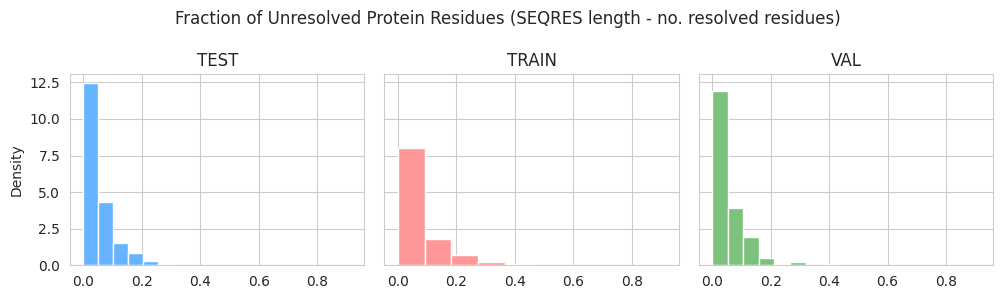

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)
grouped_data = plindex.drop_duplicates("system_id").groupby("split")
split_colors = {
    "train": "#ff9999",
    "test": "#66b3ff",
    "val": "#7cc27c",
}
for i, (split, data) in enumerate(grouped_data):
    data.system_protein_chains_fraction_unresolved_residues.hist(
        ax=axes[i], density=True, color=split_colors[split]
    )
    axes[i].set_title(split.upper())
    if i == 0:
        axes[i].set_ylabel("Density")
fig.suptitle(
    "Fraction of Unresolved Protein Residues (SEQRES length - no. resolved residues)"
)
plt.tight_layout()

In [29]:
print("Percentage of ligands with no unresolved heavy atoms:")
for split in ["train", "val", "test"]:
    print(
        f'{split.capitalize()}: {100 * (plindex[plindex["split"] == split].ligand_fraction_unresolved_heavy_atoms == 0).sum() / plindex[plindex["split"] == split].shape[0]:.2f}%'
    )

Percentage of ligands with no unresolved heavy atoms:
Train: 82.34%
Val: 90.75%
Test: 93.80%


### Pocket domains

We annotated domains from different databases onto the protein chains of each system and then picked the one spanning the pocket residues of the system as the domain of the system pocket.

In [30]:
pocket_domain_columns = column_descriptions[
    column_descriptions["Name"].str.startswith("system_pocket")
    & ~column_descriptions["Name"].str.startswith("system_pocket_validation")
]
pocket_domain_columns

Name Type                        Description
377         system_pocket_CATH  str         CATH domain for the pocket
378         system_pocket_ECOD  str         ECOD domain for the pocket
379  system_pocket_ECOD_t_name  str  ECOD_t_name domain for the pocket
380         system_pocket_Pfam  str         Pfam domain for the pocket
381        system_pocket_SCOP2  str        SCOP2 domain for the pocket
382       system_pocket_SCOP2B  str       SCOP2B domain for the pocket
383      system_pocket_PANTHER  str      PANTHER domain for the pocket
384      system_pocket_UniProt  str      UniProt domain for the pocket
385  system_pocket_kinase_name  str  kinase_name domain for the pocket

In [31]:
plindex = query_index(
    columns=["system_id"] + list(pocket_domain_columns.Name),
)

In [32]:
plindex.drop_duplicates("system_id").system_pocket_ECOD_t_name.value_counts().head(10)

system_pocket_ECOD_t_name
Nucleoplasmin-like/VP (viral coat and capsid proteins)         14051
P-loop containing nucleoside triphosphate hydrolases           13463
Protein kinase                                                 11203
TIM barrels                                                     9384
Immunoglobulin/Fibronectin type III/E set domains/PapD-like     9293
NAD(P)-binding Rossmann-fold domains                            9213
Globin-like                                                     7218
Ribosomal protein L31e/gp120 outer domain                       7141
S2 subunit of coronavirus spike glycoprotein                    6701
Viral protein domain                                            6467
Name: count, dtype: int64

In [33]:
plindex.drop_duplicates("system_id").system_pocket_kinase_name.value_counts().head(10)

system_pocket_kinase_name
CDK2        494
p38a        413
EGFR        360
CK2a1       349
AurA        278
PIM1        211
ALK2        208
JAK2        191
IRAK4       186
MAPKAPK2    183
Name: count, dtype: int64

### Ligand properties

Molecular properties and annotations are calculated from the ligand SMILES strings

In [34]:
properties = [
    "ligand_molecular_weight",
    "ligand_num_rot_bonds",
    "ligand_num_rings",
    "ligand_num_hbd",
    "ligand_num_hba",
    "ligand_num_heavy_atoms",
    "ligand_crippen_clogp",
    "ligand_qed",
    "ligand_tpsa",
    "ligand_is_kinase_inhibitor",
]
column_descriptions[column_descriptions["Name"].isin(properties)]

Name          Type  \
9      ligand_molecular_weight  float | None   
10        ligand_crippen_clogp  float | None   
11        ligand_num_rot_bonds    int | None   
12              ligand_num_hbd    int | None   
13              ligand_num_hba    int | None   
14            ligand_num_rings    int | None   
15      ligand_num_heavy_atoms    int | None   
28                 ligand_tpsa  float | None   
29                  ligand_qed  float | None   
52  ligand_is_kinase_inhibitor          bool   

                                          Description  
9                                    Molecular weight  
10  Ligand Crippen MlogP, see https://www.rdkit.or...  
11                          Number of rotatable bonds  
12                     Number of hydrogen bond donors  
13                  Number of hydrogen bond acceptors  
14                                    Number of rings  
15                              Number of heavy atoms  
28                     Topological polar surface area  
29  Ligand QED score, a measure of drug-likeness, ...  
52             Check if ligand is a kinase inhibitor.

In [35]:
plindex = query_index(
    columns=["system_id", "ligand_instance_chain", "ligand_unique_ccd_code"]
    + properties,
    splits=["train", "val", "test"],
    filters=[
        ("ligand_is_proper", "==", True) # focusing on non-ion, non-artifact ligands
    ],
)
plindex.head(20)

system_id ligand_instance_chain ligand_unique_ccd_code  \
0       3grt__1__1.A_2.A__1.B                   1.B                    FAD   
1       3grt__1__1.A_2.A__1.C                   1.C                    TS2   
2       3grt__1__1.A_2.A__2.B                   2.B                    FAD   
3       3grt__1__1.A_2.A__2.C                   2.C                    TS2   
4           1grx__1__1.A__1.B                   1.B                    GSH   
5           6grf__1__1.A__1.D                   1.D                    HSR   
6           6grf__2__1.B__1.E                   1.E                    HSR   
7   3grj__2__1.B__1.I_1.L_1.Q                   1.L                    G14   
8           3grj__1__1.A__1.F                   1.F                    G14   
9           3grj__1__1.A__1.H                   1.H                    G14   
10          8grn__1__1.A__1.C                   1.C                    LPC   
11          8grn__1__1.B__1.D                   1.D                    LPC   
12      4grc__1__1.A__1.C_1.D                   1.C                    HEM   
13      4grc__1__2.A__2.C_2.D                   2.C                    HEM   
14      4grr__1__1.B_1.C__1.K                   1.K                    AVR   
15      2grt__1__1.A_2.A__1.B                   1.B                    FAD   
16      2grt__1__1.A_2.A__1.C                   1.C                    GDS   
17      2grt__1__1.A_2.A__2.B                   2.B                    FAD   
18      2grt__1__1.A_2.A__2.C                   2.C                    GDS   
19          7grp__1__1.A__1.C                   1.C                    VXQ   

    ligand_molecular_weight  ligand_num_rot_bonds  ligand_num_rings  \
0                785.157135                    13                 6   
1                721.288731                    10                 1   
2                785.157135                    13                 6   
3                721.288731                    10                 1   
4                307.083806                     9                 0   
5                221.089937                     2                 1   
6                221.089937                     2                 1   
7                188.058577                     2                 2   
8                188.058577                     2                 2   
9                188.058577                     2                 2   
10               468.308466                    21                 0   
11               468.308466                    21                 0   
12               616.177293                     8                 6   
13               616.177293                     8                 6   
14               231.137162                     3                 2   
15               785.157135                    13                 6   
16               612.151962                    21                 0   
17               785.157135                    13                 6   
18               612.151962                    21                 0   
19               149.084064                     1                 2   

    ligand_num_hbd  ligand_num_hba  ligand_num_heavy_atoms  \
0                9              21                      53   
1               11              13                      48   
2                9              21                      53   
3               11              13                      48   
4                6               6                      20   
5                5               6                      15   
6                5               6                      15   
7                2               2                      14   
8                2               2                      14   
9                2               2                      14   
10               2               6                      31   
11               2               6                      31   
12               2               6                      43   
13               2   

In [36]:
binwidths = {
    "ligand_molecular_weight": ("Molecular weight", 50),
    "ligand_num_heavy_atoms": ("Number of heavy atoms", 5),
    "ligand_num_rot_bonds": ("Number of rotatable bonds", 2),
    "ligand_num_rings": ("Number of rings", 1),
    "ligand_tpsa": ("Topological polar surface area", 10),
    "ligand_crippen_clogp": ("Crippen logP", 1),
}
fig, axes = plt.subplots(3, 2, figsize=(10, 7))
axes = axes.flatten()
for i, prop in enumerate(binwidths):
    ax = axes[i]
    plindex.groupby("split")[prop].plot(
        kind="hist",
        density=True,
        alpha=0.5,
        histtype="stepfilled",
        legend=True,
        ax=ax,
        color=split_colors,
        bins=np.arange(
            min(plindex[prop]),
            max(plindex[prop]) + binwidths[prop][1],
            binwidths[prop][1],
        ),
    )
    ax.set_xlabel(binwidths[prop][0])
    ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

These properties were further used to categorize the ligands into different types.

In [37]:
ligand_types = [
    f"ligand_is_{x}"
    for x in [
        "lipinski",
        "covalent",
        "cofactor",
        "oligo",
        "ion",
        "fragment",
        "artifact",
    ]
]
column_descriptions[column_descriptions["Name"].isin(ligand_types)]

Name  Type  \
16  ligand_is_covalent  bool   
30       ligand_is_ion  bool   
31  ligand_is_lipinski  bool   
32  ligand_is_fragment  bool   
33     ligand_is_oligo  bool   
34  ligand_is_cofactor  bool   
36  ligand_is_artifact  bool   

                                          Description  
16  Indicator of whether a ligand  is a covalent l...  
30           Indicator of whether a ligand  is an ion  
31  Indicator of whether a ligand satisfies Lipins...  
32  Indicator of whether a ligand satisfies fragme...  
33  Indicator of whether a ligand  is an oligopept...  
34        Indicator of whether a ligand is a cofactor  
36       Indicator of whether a ligand is an artifact

These categories were also aggregated to the system level for easier filtering:

In [38]:
column_descriptions[
    column_descriptions["Name"].isin(
        [n.replace("ligand_is", "system_ligand_has") for n in ligand_types]
    )
]

Name  Type  \
144  system_ligand_has_lipinski  bool   
145  system_ligand_has_cofactor  bool   
146  system_ligand_has_fragment  bool   
147     system_ligand_has_oligo  bool   
148  system_ligand_has_artifact  bool   
150  system_ligand_has_covalent  bool   
152       system_ligand_has_ion  bool   

                                   Description  
144   Whether the system has a lipinski ligand  
145   Whether the system has a cofactor ligand  
146   Whether the system has a fragment ligand  
147  Whether the system has an oligomer ligand  
148  Whether the system has an artifact ligand  
150   Whether the system has a covalent ligand  
152              Whether the system has an ion

In [39]:
plindex = query_index(
    columns=["system_id", "ligand_unique_ccd_code"] + ligand_types,
    splits=["train", "val", "test"],
)

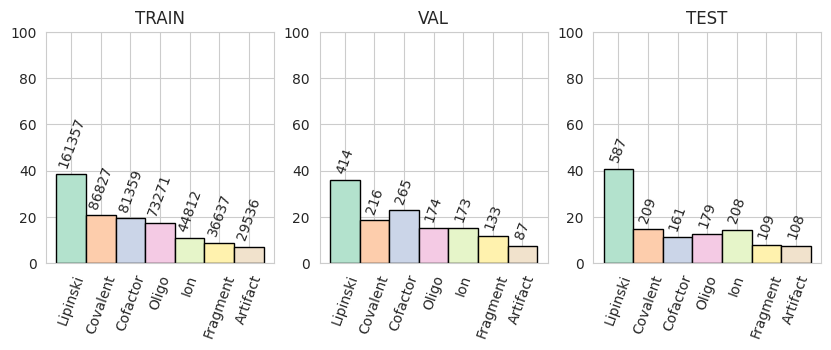

In [40]:
labels = [c.replace("ligand_is_", "").capitalize() for c in ligand_types]
bar_colors = plt.cm.Pastel2.colors
split_names = ["train", "val", "test"]
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, split in enumerate(split_names):
    ax = axes[i]
    split_data = plindex[plindex["split"] == split]
    bars = ax.bar(
        labels,
        split_data[ligand_types].mean().mul(100).to_list(),
        width=1,
        color=bar_colors,
        edgecolor="black",
        label=split,
        linewidth=1,
    )
    ax.set_xticks(np.arange(len(labels)), labels, rotation=70)
    ax.set_ylim(0, 100)
    ax.set_title(split.upper())
    counts = split_data[ligand_types].sum().to_list()
    for bar, count in zip(bars, counts):
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            bar.get_height() + 2,
            f"{count}",
            ha="center",
            va="bottom",
            rotation=70,
            fontsize=10,
        )

### PLI-specific properties

There are also some ligand properties that are specific to the interaction with the particular protein pocket present in the system. These include things like:
- The kinds of interactions the ligand may have with the protein, calculated using PLIP
- Experimental binding affinity, pulled from BindingDB when available
- Potential ligand-protein crystal contacts, defined as ligand-protein contacts below 5 √Ö which are not in the same asymmetric unit (symmetry mates) and not in the system biounit

In [41]:
pli_specific = [
    "system_fraction_atoms_with_crystal_contacts",
    "system_num_crystal_contacted_residues",
    "ligand_binding_affinity",
    "system_has_binding_affinity",
    "ligand_interactions",
    "system_num_interactions",
]
column_descriptions[column_descriptions["Name"].isin(pli_specific)]

Name          Type  \
53                       ligand_binding_affinity  float | None   
60                       system_num_interactions           int   
69                   system_has_binding_affinity          bool   
74         system_num_crystal_contacted_residues           int   
82   system_fraction_atoms_with_crystal_contacts  float | None   
158                          ligand_interactions     list[str]   

                                           Description  
53   Binding affinity (pKd or pKi) from BindingDB w...  
60                Number of interactions of the system  
69   Whether any ligand in the system has a binding...  
74   Number of residues from other symmetry mates w...  
82   Fraction of atoms in the system ligands which ...  
158                         Interactions of the ligand

In [42]:
plindex = query_index(
    columns=["system_id"] + pli_specific,
    splits=["train", "val", "test"],
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

You could filter out systems with crystal contacts:

In [43]:
(
    plindex.drop_duplicates("system_id").system_fraction_atoms_with_crystal_contacts > 0
).sum()

34467

If your model has an additional component for predicting binding affinity, you could see how much data is available for training and evaluation:

In [44]:
plindex.drop_duplicates("system_id").groupby(
    "split"
).system_has_binding_affinity.value_counts()

split  system_has_binding_affinity
test   False                             862
       True                              174
train  False                          261204
       True                            47936
val    False                             685
       True                              147
Name: count, dtype: int64

Text(0, 0.5, 'No. of system ligands')

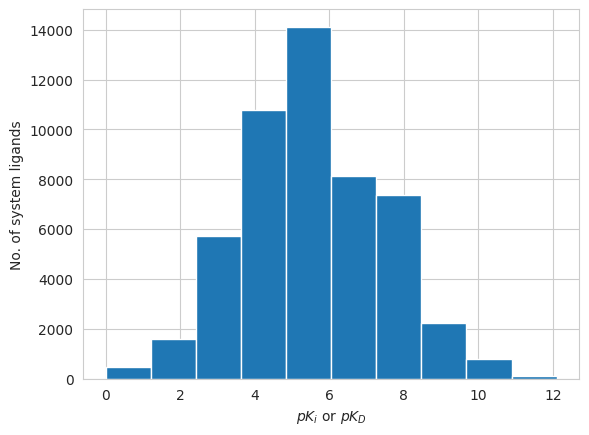

In [45]:
plindex["ligand_binding_affinity"].hist()
plt.xlabel(r"$pK_i$ or $pK_D$")
plt.ylabel("No. of system ligands")

You could even look deeper into the kinds of protein-ligand interactions present in your training data:

In [46]:
plindex.groupby("split").system_num_interactions.describe()

count       mean        std  min  25%   50%   75%    max
split                                                             
test     1436.0  16.591226   9.886007  3.0  9.0  15.0  22.0   51.0
train  418381.0  14.448139  12.087511  0.0  5.0  12.0  21.0  722.0
val      1157.0  16.078652  10.204647  0.0  8.0  14.0  22.0   49.0

In [47]:
plindex["ligand_interactions"].values[0]

array(['1.A_36_type:hydrogen_bonds__protisdon:False__sidechain:False',
       '1.A_113_type:hydrogen_bonds__protisdon:False__sidechain:False',
       '1.A_113_type:hydrogen_bonds__protisdon:True__sidechain:False',
       '1.A_312_type:hydrogen_bonds__protisdon:False__sidechain:False',
       '1.A_320_type:hydrogen_bonds__protisdon:False__sidechain:False',
       '1.A_322_type:hydrogen_bonds__protisdon:False__sidechain:True',
       '1.A_322_type:hydrogen_bonds__protisdon:True__sidechain:False',
       '1.A_40_type:hydrogen_bonds__protisdon:True__sidechain:False',
       '1.A_40_type:hydrophobic_contacts',
       '1.A_13_type:hydrogen_bonds__protisdon:True__sidechain:False',
       '1.A_13_type:hydrogen_bonds__protisdon:True__sidechain:True',
       '1.A_11_type:hydrogen_bonds__protisdon:True__sidechain:False',
       '1.A_35_type:hydrogen_bonds__protisdon:True__sidechain:True',
       '1.A_34_type:hydrogen_bonds__protisdon:True__sidechain:False',
       '1.A_49_type:hydrogen_bonds__pro

## Beyond the split (optional)

Here we mainly focused on systems in the train/val/test splits as the train and val splits are the ones that can be used for training models to either participate in the PLINDER leaderboard or compare your models' performance to methods in the leaderboard.

However, PLINDER itself contains all PLI systems in the PDB (except those containing only crystallization artifacts), and you may be interested in this dataset as a whole. This can be queried with the `splits=["*"]` option.

In [48]:
plindex = query_index(
    columns=[
        "system_id",
        "entry_pdb_id",
        "system_num_protein_chains",
        "system_num_ligand_chains",
    ]
    + ligand_types,
    splits=["*"],
)
print("No. ligands:", len(plindex))
print("No. systems:", plindex.system_id.nunique())
print("No. PDB entries:", plindex.entry_pdb_id.nunique())

No. ligands: 1357906
No. systems: 990260
No. PDB entries: 143800


system_num_protein_chains
1     857629
2     312129
3      73237
4      19875
30     14122
       ...  
72        72
64        64
53        61
52        52
29        30
Name: count, Length: 74, dtype: int64
system_num_ligand_chains
1     809509
2     248916
3     107613
4      45856
5      17065
       ...  
84        84
39        78
74        74
67        67
46        46
Name: count, Length: 238, dtype: int64


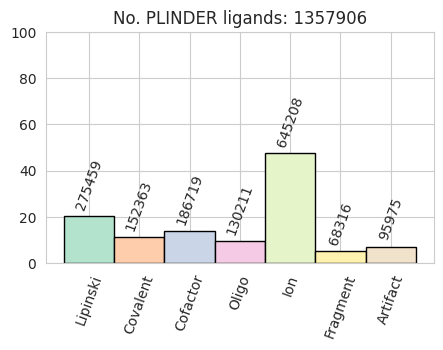

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
bars = ax.bar(
    labels,
    plindex[ligand_types].mean().mul(100).to_list(),
    width=1,
    color=bar_colors,
    edgecolor="black",
    label=split,
    linewidth=1,
)
ax.set_xticks(np.arange(len(labels)), labels, rotation=70)
ax.set_ylim(0, 100)
ax.set_title(f"No. PLINDER ligands: {len(plindex)}")
counts = plindex[ligand_types].sum().to_list()
for bar, count in zip(bars, counts):
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        bar.get_height() + 2,
        f"{count}",
        ha="center",
        va="bottom",
        rotation=70,
        fontsize=10,
    )

print(plindex.system_num_protein_chains.value_counts())
print(plindex.system_num_ligand_chains.value_counts())

When looking at distributions across the entire dataset, you'll notice that there are quite a lot of ion systems, as well as systems with more than 5 protein or ligand chains.

**NOTE: _While we provide annotations for all systems, those which are not in the train and val splits may not be used for training models to participate in the MLSB PLINDER leaderboard._**

## Similarity clusters

Similarity between two protein-ligand complexes can occur at various levels, including protein sequence, structural features, binding pocket characteristics, or ligand and interaction properties. We calculated a comprehensive set of similarity metrics to cover every combination of these dimensions ‚Äî from identical systems, where the protein, pocket, interactions and ligand are the same, to systems that differ across all levels.

The entire set of similarity metrics is described [here](https://plinder-org.github.io/plinder/dataset.html#clusters-clusters), and they were calculated across all pairs of systems having a Foldseek or MMseqs alignment. We then used graph clustering to group systems into clusters based on their similarity with a specific **_metric_** and **_threshold_**. There are three types of clusters available: strongly connected graph components (**_strong component_**), weakly connected graph components (**_weak component_**), and communities detected using asynchronous label propagation (**_community_**).

We can load the similarity clusters assigned to each system for different metrics, thresholds, and clustering types.

In [49]:
column_descriptions[
    column_descriptions["Name"].str.startswith("pocket_")
    & column_descriptions["Name"].str.contains("community")
]

Name Type  \
601        pocket_fident__50__community  str   
602        pocket_fident__70__community  str   
603        pocket_fident__95__community  str   
604       pocket_fident__100__community  str   
605   pocket_fident_qcov__50__community  str   
606   pocket_fident_qcov__70__community  str   
607   pocket_fident_qcov__95__community  str   
608  pocket_fident_qcov__100__community  str   
609          pocket_lddt__50__community  str   
610          pocket_lddt__70__community  str   
611          pocket_lddt__95__community  str   
612         pocket_lddt__100__community  str   
613     pocket_lddt_qcov__50__community  str   
614     pocket_lddt_qcov__70__community  str   
615     pocket_lddt_qcov__95__community  str   
616    pocket_lddt_qcov__100__community  str   
617          pocket_qcov__50__community  str   
618          pocket_qcov__70__community  str   
619          pocket_qcov__95__community  str   
620         pocket_qcov__100__community  str   

                                           Description  
601  Cluster ID for community built from pocket_fid...  
602  Cluster ID for community built from pocket_fid...  
603  Cluster ID for community built from pocket_fid...  
604  Cluster ID for community built from pocket_fid...  
605  Cluster ID for community built from pocket_fid...  
606  Cluster ID for community built from pocket_fid...  
607  Cluster ID for community built from pocket_fid...  
608  Cluster ID for community built from pocket_fid...  
609  Cluster ID for community built from pocket_ldd...  
610  Cluster ID for community built from pocket_ldd...  
611  Cluster ID for community built from pocket_ldd...  
612  Cluster ID for community built from pocket_ldd...  
613  Cluster ID for community built from pocket_ldd...  
614  Cluster ID for community built from pocket_ldd...  
615  Cluster ID for community built from pocket_ldd...  
616  Cluster ID for community built from pocket_ldd...  
617  Cluster ID for community built from pocket_qco...  
618  Cluster ID for community built from pocket_qco...  
619  Cluster ID for community built from pocket_qco...  
620  Cluster ID for community built from pocket_qco...

In [50]:
column_descriptions[
    column_descriptions["Name"].str.startswith("pocket_lddt")
    & column_descriptions["Name"].str.contains("component")
]

Name Type  \
420          pocket_lddt__50__weak__component  str   
421          pocket_lddt__70__weak__component  str   
422          pocket_lddt__95__weak__component  str   
423         pocket_lddt__100__weak__component  str   
424        pocket_lddt__50__strong__component  str   
425        pocket_lddt__70__strong__component  str   
426        pocket_lddt__95__strong__component  str   
427       pocket_lddt__100__strong__component  str   
428     pocket_lddt_qcov__50__weak__component  str   
429     pocket_lddt_qcov__70__weak__component  str   
430     pocket_lddt_qcov__95__weak__component  str   
431    pocket_lddt_qcov__100__weak__component  str   
432   pocket_lddt_qcov__50__strong__component  str   
433   pocket_lddt_qcov__70__strong__component  str   
434   pocket_lddt_qcov__95__strong__component  str   
435  pocket_lddt_qcov__100__strong__component  str   

                                           Description  
420  Cluster ID for weak component built from pocke...  
421  Cluster ID for weak component built from pocke...  
422  Cluster ID for weak component built from pocke...  
423  Cluster ID for weak component built from pocke...  
424  Cluster ID for strong component built from poc...  
425  Cluster ID for strong component built from poc...  
426  Cluster ID for strong component built from poc...  
427  Cluster ID for strong component built from poc...  
428  Cluster ID for weak component built from pocke...  
429  Cluster ID for weak component built from pocke...  
430  Cluster ID for weak component built from pocke...  
431  Cluster ID for weak component built from pocke...  
432  Cluster ID for strong component built from poc...  
433  Cluster ID for strong component built from poc...  
434  Cluster ID for strong component built from poc...  
435  Cluster ID for strong component built from poc...

These cluster labels can be used in many ways with the annotations.

### Example: ATP-binding pockets (optional)

For example, maybe you are interested in seeing how many different kinds of ATP-binding pockets we have. First, let's find all the analogs of ATP. We can do this by finding the 95% ECFP4 tanimoto similarity component of ATP and then getting the CCD codes of all the ligands in the same cluster:

In [51]:
ligand_cluster_column = "tanimoto_similarity_max__95__strong__component"
atp_ligand_cluster = query_index(
    columns=[
        ligand_cluster_column,
    ],
    filters=[
        ("ligand_unique_ccd_code", "==", "ATP"),
        ("system_num_ligand_chains", "==", 1),
    ],
)[ligand_cluster_column].values[0]

atp_analogs = (
    query_index(
        columns=["system_id", "entry_pdb_id", "ligand_unique_ccd_code", "ligand_rdkit_canonical_smiles"],
        filters=[
            (ligand_cluster_column, "==", atp_ligand_cluster),
            ("system_num_ligand_chains", "==", 1),
        ],
    ).drop_duplicates("ligand_unique_ccd_code")
)
atp_analogs_code_set = set(atp_analogs.ligand_unique_ccd_code.unique())
atp_analogs_code_set

{'5FA', 'ADP', 'AQP', 'ATP', 'ZF9', 'ZSF'}

Let's see how they look

In [52]:
import mols2grid
grid = mols2grid.MolGrid(atp_analogs, smiles_col='ligand_rdkit_canonical_smiles')
grid.display(subset=["ligand_unique_ccd_code","img"])

MolGridWidget()

Now we can get the pocket clusters of all systems containing ATP analogs. Here we're using `pocket_qcov__50__weak__component`, meaning a system within a cluster has some other system in that cluster with which it shares at least 50% of pocket residues when aligned.

In [53]:
pocket_cluster_column = "pocket_qcov__50__weak__component"
plindex = query_index(
    columns=[
        "system_id",
        "entry_pdb_id",
        "entry_release_date",
        pocket_cluster_column,
        "system_pocket_ECOD_t_name",
    ],
    filters=[
        ("ligand_unique_ccd_code", "in", atp_analogs_code_set),  # only ATP-binding systems
        ("ligand_num_interactions", ">", 2),  # with >2 interactions with ATP
        ("system_num_ligand_chains", "==", 1),  # and ATP is the only ligand
    ],
)

In [54]:
(
    "No. systems:", plindex.system_id.nunique(),
    "No. PDB entries:", plindex.entry_pdb_id.nunique(),
    "No. clusters:", plindex[pocket_cluster_column].nunique(),
)

('No. systems:', 5409, 'No. PDB entries:', 1484, 'No. clusters:', 154)

In [55]:
plindex[pocket_cluster_column].value_counts().head(10)

pocket_qcov__50__weak__component
c0      3562
c123     260
c11      259
c206     146
c204     141
c132      80
c391      75
c95       73
c205      58
c319      58
Name: count, dtype: int64

When we look at the ECOD topology names of the cluster "c11" for example, we see that these systems are GroEL equatorial domain-like domains. Interestingly, 7 systems from 2 different PDB entries don't have ECOD annotations yet as they were recently released, but are indeed [the same domain](https://doi.org/10.1038/s41467-024-45242-x).

In [56]:
plindex[plindex[pocket_cluster_column] == "c11"].system_pocket_ECOD_t_name.value_counts(
    dropna=False
)

system_pocket_ECOD_t_name
GroEL equatorial domain-like    252
None                              7
Name: count, dtype: int64

In [57]:
plindex[
    (plindex[pocket_cluster_column] == "c11")
    & (plindex["system_pocket_ECOD_t_name"].isna())
].drop_duplicates("entry_pdb_id")

system_id entry_pdb_id entry_release_date  \
527   8i6j__1__1.B__1.C         8i6j         2023-01-28   
2756  8hki__1__1.I__1.Q         8hki         2022-11-27   

     pocket_qcov__50__weak__component system_pocket_ECOD_t_name  split  
527                               c11                      None  train  
2756                              c11                      None  train

In [58]:
plindex[plindex["system_pocket_ECOD_t_name"].isna()]["entry_pdb_id"].nunique()

290

### Example: Diversity sampling (optional)

The `pli_unique_qcov__50__community` column clusters systems such that the protein and ligand make similar interactions with the pocket. This clustering combines protein sequence and structural similarity (needed to obtain the pocket alignment), as well as the ligand-pocket interactions, making it a good proxy for unique kinds of binding present in the dataset.

Here's an example of how one might use `torch.utils.data.WeightedRandomSampler` to sample training systems based on their PLI community cluster.

In [59]:
from torch.utils.data import WeightedRandomSampler

cluster_column = "pli_unique_qcov__50__community"

# Get train systems and their cluster labels
plindex = query_index(
    columns=["system_id", "entry_pdb_id", cluster_column], splits=["train"]
).drop_duplicates("system_id")

# Add the number of systems in each cluster to the dataframe
plindex = plindex.merge(
    plindex[cluster_column].value_counts().rename("cluster_num_systems"),
    left_on=cluster_column,
    right_index=True,
).reset_index(drop=True)

# Add the number of PDB entries in each cluster to the dataframe
plindex = plindex.merge(
    plindex.drop_duplicates("entry_pdb_id")[cluster_column]
    .value_counts()
    .rename("cluster_num_entries"),
    left_on=cluster_column,
    right_index=True,
).reset_index(drop=True)

# Ignore clusters with only one PDB entry
sample_from = plindex[plindex["cluster_num_entries"] > 1].reset_index(drop=True)

# Calculate the weight for each cluster
cluster_weights = 1.0 / sample_from.cluster_num_systems.values

# Create a WeightedRandomSampler and sample systems from the train set
sampler = WeightedRandomSampler(
    weights=cluster_weights, num_samples=len(cluster_weights)
)
sampled_indices = list(sampler)
sampled_plindex = (
    sample_from.iloc[sampled_indices]
    .reset_index(drop=True)
    .drop(columns=["cluster_num_systems", "cluster_num_entries"])
)

# Add the number of sampled systems in each cluster to the sampled dataframe
sampled_plindex = sampled_plindex.merge(
    sampled_plindex[cluster_column].value_counts().rename("cluster_num_systems"),
    left_on=cluster_column,
    right_index=True,
).reset_index(drop=True)

# Add the number of sampled PDB entries in each cluster to the sampled dataframe
sampled_plindex = (
    sampled_plindex.merge(
        sampled_plindex.drop_duplicates("entry_pdb_id")[cluster_column]
        .value_counts()
        .rename("cluster_num_entries"),
        left_on=cluster_column,
        right_index=True,
    )
)

In [60]:
print("No. of original systems: ", sample_from.system_id.nunique())
print("No. of nonredundant sampled systems: ", sampled_plindex.system_id.nunique())
print("No. of original clusters: ", sample_from[cluster_column].nunique())
print("No. of sampled clusters: ", sampled_plindex[cluster_column].nunique())

No. of original systems:  259772
No. of nonredundant sampled systems:  57298
No. of original clusters:  2723
No. of sampled clusters:  2721


Let's see how the sampling process has affected the distribution of cluster sizes.

Text(0, 0.5, '# Clusters')

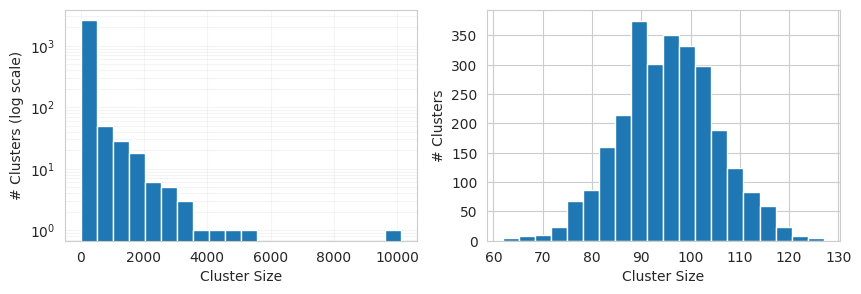

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

cluster_sizes = (
    sample_from.drop_duplicates(cluster_column)
    .cluster_num_systems.value_counts()
    .sort_index()
)
ax[0].hist(cluster_sizes.index, weights=cluster_sizes.values, bins=20, log=True)
ax[0].set_xlabel("Cluster Size")
ax[0].set_ylabel("# Clusters (log scale)")
ax[0].grid(True, which="both", ls="-", alpha=0.2)

cluster_sizes = (
    sampled_plindex.drop_duplicates(cluster_column)
    .cluster_num_systems.value_counts()
    .sort_index()
)
ax[1].hist(cluster_sizes.index, weights=cluster_sizes.values, bins=20, log=False)
ax[1].set_xlabel("Cluster Size")
ax[1].set_ylabel("# Clusters")

## Beyond the PLINDEX (optional)

Not everything we annotated made it into the index file, as we tried to compromise between accessibility and usability. Here's how to get some more data from the additional files that are part of the dataset.

### Annotation JSON files

With `plinder.core.index.utils.load_entries` you can load the JSON file of a particular PDB ID and access all the information we extracted and saved for that ID.



In [ ]:
from plinder.core.index.utils import load_entries

In [ ]:
entries = load_entries(pdb_ids=["4agi"])

In [ ]:
entries["4agi"].keys()

dict_keys(['pdb_id', 'release_date', 'oligomeric_state', 'determination_method', 'keywords', 'pH', 'resolution', 'chains', 'ligand_like_chains', 'systems', 'covalent_bonds', 'chain_to_seqres', 'validation', 'pass_criteria', 'water_chains', 'symmetry_mate_contacts'])

In [ ]:
entries["4agi"]["systems"]["4agi__1__1.C__1.W"].keys()

dict_keys(['pdb_id', 'biounit_id', 'ligands', 'ligand_validation', 'pocket_validation', 'pass_criteria'])

In [ ]:
entries["4agi"]["systems"]["4agi__1__1.C__1.W"]["ligands"][0].keys()

dict_keys(['pdb_id', 'biounit_id', 'asym_id', 'instance', 'ccd_code', 'plip_type', 'bird_id', 'centroid', 'smiles', 'resolved_smiles', 'residue_numbers', 'rdkit_canonical_smiles', 'molecular_weight', 'crippen_clogp', 'num_rot_bonds', 'num_hbd', 'num_hba', 'num_rings', 'num_heavy_atoms', 'is_covalent', 'covalent_linkages', 'neighboring_residues', 'neighboring_ligands', 'interacting_residues', 'interacting_ligands', 'interactions', 'neighboring_residue_threshold', 'neighboring_ligand_threshold', 'num_neighboring_ppi_atoms_within_4A_of_gap', 'num_neighboring_ppi_atoms_within_8A_of_gap', 'num_missing_ppi_interface_residues', 'num_pli_atoms_within_4A_of_gap', 'num_pli_atoms_within_8A_of_gap', 'num_missing_pli_interface_residues', 'num_resolved_heavy_atoms', 'num_unresolved_heavy_atoms', 'tpsa', 'qed', 'is_ion', 'is_lipinski', 'is_fragment', 'is_oligo', 'is_cofactor', 'in_artifact_list', 'is_artifact', 'is_other', 'is_invalid', 'posebusters_result', 'unique_ccd_code', 'waters', 'crystal_cont

### Annotation PyDantic classes

With `plinder.data.pipeline.utils.load_entries_from_zips` you can reconstruct the PyDantic dataclasses of the `Entry`, `System` and `Ligand`s to get access to more properties (though this requires a developer install of plinder with more dependencies)

In [ ]:
from plinder.data.pipeline.utils import load_entries_from_zips
from pathlib import Path

entries = load_entries_from_zips(data_dir=Path(cfg.data.plinder_dir), pdb_ids=["4agi"])

In [ ]:
import pandas as pd

In [ ]:
rows = []
for name, (description, ftype) in entries["4agi"].get_descriptions_and_types().items():
  rows.append((name, description, ftype))
pd.DataFrame(rows, columns=["Name", "Description", "Type"])

Name                                        Description  \
0                   pdb_id  RCSB PDB ID. See https://mmcif.wwpdb.org/dicti...   
1             release_date  RCSB structure release date. See https://mmcif...   
2         oligomeric_state  Author's provided description of quaternary st...   
3     determination_method  RCSB method of structure determination. See ht...   
4                 keywords  RCSB keywords describing the structure. See ht...   
5                       pH  pH at which structure is solved. See https://m...   
6               resolution  RCSB structure resolution. See https://mmcif.w...   
7                   chains  __Chains dictionary with chain name mapped to ...   
8       ligand_like_chains  __Chain: chain type for other ligand-like chai...   
9                  systems  __System dictionary with system id mapped to s...   
10          covalent_bonds  __All covalent interactions in the entry as de...   
11         chain_to_seqres                        __Chain to sequence mapping   
12              validation                                 __Entry validation   
13           pass_criteria                   __Entry pass validation criteria   
14            water_chains                        __Water chains in the entry   
15  symmetry_mate_contacts              __Symmetry mate contacts in the entry   
16          author_to_asym  \n        __Map author chain id to asym id\n  ...   

                                Type  
0                                str  
1                                str  
2                         str | None  
3                         str | None  
4                         str | None  
5                         str | None  
6                       float | None  
7                   dict[str, Chain]  
8                     dict[str, str]  
9                  dict[str, System]  
10  dict[str, list[tuple[str, str]]]  
11                    dict[str, str]  
12            EntryValidation | None  
13                       bool | None  
14                         list[str]  
15              SymmetryMateContacts  
16                    dict[str, str]

In [ ]:
entries["4agi"].validation

EntryValidation(resolution=1.6, rfree=0.19, r=0.15, clashscore=1.17, percent_rama_outliers=0.32, percent_rota_outliers=1.23, data_completeness=95.72, percent_RSRZ_outliers=0.0, atom_count=11266, molprobity=0.8983484492741365, mean_b_factor=12.817485613528603, median_b_factor=10.989999771118164, pdbx_resolution=1.6, pdbx_reflns_resolution=1.6, meanI_over_sigI_obs=4.1, r_minus_rfree=0.04000000000000001)

In [ ]:
rows = []
for name, (description, ftype) in entries["4agi"].systems["4agi__1__1.C__1.W"].get_descriptions_and_types().items():
  rows.append((name, description, ftype))
pd.DataFrame(rows, columns=["Name", "Description", "Type"])

Name  \
0                                 pdb_id   
1                             biounit_id   
2                                ligands   
3                      ligand_validation   
4                      pocket_validation   
5                          pass_criteria   
6                 protein_chains_asym_id   
7                          id_no_biounit   
8                          ligand_chains   
9                    num_pocket_residues   
10            proper_num_pocket_residues   
11                      num_interactions   
12               proper_num_interactions   
13               num_unique_interactions   
14        proper_num_unique_interactions   
15                  num_covalent_ligands   
16           proper_num_covalent_ligands   
17                                    id   
18                           system_type   
19                  has_kinase_inhibitor   
20                  has_binding_affinity   
21                       pocket_residues   
22                          interactions   
23                  interactions_counter   
24                    num_protein_chains   
25             proper_num_protein_chains   
26                     num_ligand_chains   
27              proper_num_ligand_chains   
28                                waters   
29        num_crystal_contacted_residues   
30       num_atoms_with_crystal_contacts   
31                       num_heavy_atoms   
32              num_resolved_heavy_atoms   
33                        ligand_max_qed   
34           ligand_max_molecular_weight   
35    proper_ligand_max_molecular_weight   
36            num_unresolved_heavy_atoms   
37  fraction_atoms_with_crystal_contacts   

                                          Description  \
0                                            __PDB ID   
1                                          Biounit ID   
2                      __List of Ligands in a systems   
3   __Validation object for the ligand residues in...   
4   __Validation object for the system's pocket re...   
5                           __Passes quality criteria   
6   \n        Interacting protein chains of the sy...   
7   \n        ID of the system without the biounit...   
8     \n        Ligand chains of the system\n           
9   \n        Number of pocket residues of the sys...   
10  \n        Number of pocket residues of the sys...   
11  \n        Number of interactions of the system...   
12  \n        Number of interactions of the system...   
13  \n        Number of unique interactions of the...   
14  \n        Number of unique interactions of the...   
15  \n        Number of covalent ligands of the sy...   
16  \n        Number of covalent ligands of the sy...   
17               \n        ID of the system\n           
18  \n        Type of the system (one of: holo, io...   
19  \n        Whether the system has a kinase inhi...   
20  \n        Whether any ligand in the system has...   
21  \n        __Pockets residues of the system\n  ...   
22   \n        __Interactions of the system\n           
23  \n        __Counter of interactions of the sys...   
24  \n        Number of interacting protein chains...   
25  \n        Number of interacting protein chains...   
26  \n        Number of ligand chains of the syste...   
27  \n        Number of ligand chains of the syste...   
28  \n        __Waters interacting (as detected by...   
29  \n        Number of residues from other symmet...   
30  \n        Number of atoms in the system ligand...   
31  \n        Number of heavy atoms in the system ...   
32  \n        Number of resolved heavy atoms in th...   
33  \n        Maximum QED of the system ligands\n ...   
34  \n        Maximum molecular weight of the syst...   
35  \n        Maximum molecular weight of the syst...   
36  \n        Number of unresolved heavy atoms in ...   
37  \n        Fraction of atoms in the system liga...   

                                     Type  
0                                     str  
1      

In [ ]:
rows = []
for name, (description, ftype) in entries["4agi"].systems["4agi__1__1.C__1.W"].ligands[0].get_descriptions_and_types().items():
  rows.append((name, description, ftype))
pd.DataFrame(rows, columns=["Name", "Description", "Type"])

Name                                        Description  \
0                 pdb_id  __RCSB PDB ID, see https://mmcif.wwpdb.org/dic...   
1             biounit_id                                       __Biounit id   
2                asym_id                         Ligand chain asymmetric id   
3               instance                                Biounit instance ID   
4               ccd_code    Ligand Chemical Component Dictionary (CCD) code   
..                   ...                                                ...   
63                    id  \n        Unique identifier for a given ligand...   
64        instance_chain  \n        Instance chain for a given ligand.\n...   
65  interactions_counter  \n        __Counter of interactions for a give...   
66   is_kinase_inhibitor  \n        Check if ligand is a kinase inhibito...   
67      binding_affinity  \n        Binding affinity (pKd or pKi) from B...   

                                     Type  
0                                     str  
1                                     str  
2                                     str  
3                                     int  
4                                     str  
..                                    ...  
63                                    str  
64                                    str  
65  dict[str, dict[int, ty.Counter[str]]]  
66                                   bool  
67                           float | None  

[68 rows x 3 columns]

In [ ]:
entries["4agi"].systems["4agi__1__1.C__1.W"].pocket_residues

defaultdict(dict,
            {'1.C': {22: 'interacting',
              23: 'neighboring',
              24: 'interacting',
              40: 'interacting',
              44: 'interacting',
              271: 'neighboring',
              280: 'neighboring',
              282: 'interacting',
              284: 'neighboring',
              296: 'interacting',
              298: 'neighboring',
              300: 'neighboring',
              308: 'neighboring',
              309: 'interacting'}})

In [ ]:
entries["4agi"].systems["4agi__1__1.C__1.W"].ligands[0].interactions

{'1.C': {296: ['type:hydrogen_bonds__protisdon:False__sidechain:True'],
  309: ['type:hydrogen_bonds__protisdon:True__sidechain:False'],
  282: ['type:hydrogen_bonds__protisdon:True__sidechain:True'],
  22: ['type:hydrophobic_contacts', 'type:water_bridges__protisdon:True'],
  24: ['type:hydrophobic_contacts'],
  40: ['type:hydrophobic_contacts'],
  44: ['type:water_bridges__protisdon:False']}}

In [ ]:
entries["4agi"].chains["C"].residues[22]

Residue(chain='C', index=20, number=22, auth_number='22', one_letter_code='N', name='ASN', chem_type='A', validation=ResidueValidation(altcode='.', inscode='?', rsr=0.074, rsrz=-0.48, rscc=0.957, average_occupancy=1.0, average_b_factor=13.938749999999999, unknown_residue=False, atom_count=8, unknown_atom_count=0, heavy_atom_count=8, num_unresolved_heavy_atoms=0, is_outlier={'geometry': False, 'density': False, 'chirality': False, 'clashes': False}, is_atom_count_consistent=True, has_clashing_partial_occupancy_atoms=False, alt_count=1))

### Similarity scores



If you want more direct similarities between systems than the provided cluster labels, we also provide the entire set of calculated similarity scores, in three kinds of similarity datasets:
- Similarity between ligand bound systems (`holo`)
- Similarity between holo systems and unbound protein structures (`apo`) where "unbound" can also include only ion-bound and only artifact-bound.
- Similarity between holo systems and Alphafold predicted structures (`pred`) where the search was performed on all AFDB models having a UniProt ID present in any of the holo systems.

Any of these could be specified in `query_protein_similarity()`

**NOTE: _The "holo" search database takes 68G of disk space and, depending on the metric, threshold and filters used, can take up to a terabyte of RAM to query._**

The `apo` and `pred` search databases on the other hand are the result of a Foldseek + MMseqs search with a very strict coverage and identity threshold of 0.9. Thus, they are much smaller and lighter to query, and do not contain very sensitive or remote similarities. We'll see an example of querying these later on.

Here is an example of using the `query_protein_similarity` function to get the similarities > 50 between a "train" set and a "test" set for the `pli_unique_qcov` metric

```python
# Example train systems
train = ["7jxf__1__1.A_1.B__1.G", "1jtu__1__1.A_1.B__1.C_1.D",
         "8f9d__2__1.C_1.D__1.G", "6a9a__1__1.A_2.A__2.C_2.D",
         "1b5e__2__1.A_1.B__1.D"]
# Example test systems
test = ["1b5d__1__1.A_1.B__1.D", "1s2g__1__1.A_2.C__1.D",
       "4agi__1__1.C__1.W", "4n7m__1__1.A_1.B__1.C",
         "7eek__1__1.A__1.I"]

metric = "pli_unique_qcov"
threshold = 50
query_protein_similarity(
        search_db="holo",
        columns=["query_system", "target_system", "similarity"],
        filters=[
                ("query_system", "in", test),
                ("target_system", "in", train),
                ("metric", "==", metric),
                ("similarity", ">=", threshold),
            ],
)
```

For ligand similarities, one can use the following approach:

In [ ]:
from plinder.core.scores import query_index

plindex = query_index(columns=["system_id", "ligand_rdkit_canonical_smiles"], splits=["val"])

In [ ]:
# Example test and train

test = set(plindex.system_id.values[:10])
train = set(plindex.system_id.values[20:50])

In [ ]:
from plinder.data import smallmolecules

plindex["fp"] = plindex["ligand_rdkit_canonical_smiles"].map(smallmolecules.mol2morgan_fp)
test_set = plindex.loc[plindex["system_id"].isin(test)].reset_index(drop=True)
test_set["tanimoto_similarity_max"] = smallmolecules.tanimoto_maxsim_matrix(
    plindex.loc[plindex["system_id"].isin(train)]["fp"].to_list(),
    test_set["fp"].to_list(),
)

In [ ]:
test_set["tanimoto_similarity_max"]

0      14.285714
1     100.000000
2       0.000000
3      81.355932
4     100.000000
5      85.714286
6      98.214286
7      14.285714
8       0.000000
9      13.559322
10     16.438356
Name: tanimoto_similarity_max, dtype: float64

# Accessing system files



We provide files for all holo PLINDER systems with <6 protein and <6 ligand chains. These can be accessed with the `PlinderSystem` object which also does the work of downloading and extracting only the relevant files.

In [62]:
from plinder.core import PlinderSystem

plinder_system = PlinderSystem(system_id="4agi__1__1.C__1.W")

We can visualise the system using py3Dmol

In [70]:
view = py3Dmol.view()
view.setBackgroundColor('white')

view.addModel(open(plinder_system.system_cif, 'r').read(),'cif')
view.setStyle({'chain':"1.C"}, {'cartoon': {'color':'purple'}})
view.setStyle({'chain':"1.W"}, {'stick': {'colorScheme':'elem'}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Ligand

The ligands are provided in SDF format in `ligand_sdfs`.


In [ ]:
plinder_system.ligand_sdfs

{'1.W': '/content/plinder/2024-06/v2/systems/4agi__1__1.C__1.W/ligand_files/1.W.sdf'}

And the corresponding SMILES strings in `smiles`.

In [ ]:
plinder_system.smiles

{'1.W': 'C[Se][C@@H]1O[C@@H](C)[C@@H](O)[C@@H](O)[C@@H]1O'}

### Receptor

The CIF/PDB files of the receptor are stored in `receptor_cif` and `receptor_pdb` and only contain the protein chains of the system.

In [ ]:
plinder_system.receptor_pdb, plinder_system.receptor_cif

('/content/plinder/2024-06/v2/systems/4agi__1__1.C__1.W/receptor.pdb',
 '/content/plinder/2024-06/v2/systems/4agi__1__1.C__1.W/receptor.cif')

We recommend using the CIF file as PDB is an obsoleted format. However, if you must use the PDB file, an additional consideration is that the chains are renamed to single letters, which you can access with the `chain_mapping` attribute.


In [ ]:
plinder_system.chain_mapping

{'1.C': 'A'}

The FASTA file and sequences of the receptor are stored in `sequences_fasta` and `sequences` respectively. These are the canonical sequences of all protein chains in the system.


In [ ]:
plinder_system.sequences_fasta, plinder_system.sequences

('/content/plinder/2024-06/v2/systems/4agi__1__1.C__1.W/sequences.fasta',
 {'1.C': 'MSTPGAQQVLFRTGIAAVNSTNHLRVYFQDVYGSIRESLYEGSWANGTEKNVIGNAKLGSPVAATSKELKHIRVYTLTEGNTLQEFAYDSGTGWYNGGLGGAKFQVAPYSXIAAVFLAGTDALQLRIYAQKPDNTIQEYMWNGDGWKEGTNLGGALPGTGIGATSFRYTDYNGPSIRIWFQTDDLKLVQRAYDPHKGWYPDLVTIFDRAPPRTAIAATSFGAGNSSIYMRIYFVNSDNTIWQVCWDHGKGYHDKGTITPVIQGSEVAIISWGSFANNGPDLRLYFQNGTYISAVSEWVWNRAHGSQLGRSALPPA'})

### Linked structures

Where possible, we've linked plinder systems to associated apo structures from the PDB and predicted structures from AFDB. This was done using the same kind of similarity searches used for system clustering except with strict restrictions on the sequence identity and coverage of linked structures.

The `linked_structures` attribute is a pandas DataFrame with information on the links for a system which were both found and additionally scored for conformational difficulty. This additional scoring consists of superposing the found apo or predicted chain to the receptor of the system with global sequence-based alignment, transplanting the ligand to the found structure, and evaluating the resulting protein-ligand complex as though it were a predicted structure for the given system. So, the `linked_structures` DataFrame contains the similarity scores from the alignments as well as the metrics from the evaluation.

In [ ]:
link_info = plinder_system.linked_structures

In [ ]:
link_info[
    [
        "id",
        "pocket_fident",
        "lddt",
        "bb_lddt",
        "lddt_lp_ave",
        "lddt_pli_ave", # TODO: rename lddt_pli_amd_ave to this
        "scrmsd_ave", # TODO: replace with bisy_rmsd_ave
        "sort_score",
        "kind",
    ]
]

id  pocket_fident      lddt   bb_lddt  lddt_lp_ave  lddt_pli_ave  \
0    4uou_B          100.0  0.972682  0.994065     0.987813      0.989623   
1    4uou_C          100.0  0.973562  0.994687     0.967287      0.971698   
2    4uou_D          100.0  0.973604  0.994235     0.972579      0.973585   
3    4uou_A          100.0  0.967257  0.994800     0.976908      0.963208   
4  Q4WW81_A          100.0  0.982275  0.998587     0.999679      0.997170   

   scrmsd_ave  sort_score  kind  
0    0.159702        2.40   apo  
1    0.194233        2.40   apo  
2    0.101252        2.40   apo  
3    0.214243        2.40   apo  
4    0.126228       98.57  pred

For example, here we can see that "4uou_B"
- has 100% identical residues corresponding to the pocket of the system
- has a very high lDDT and backbone lDDT scores, indicating that the structure is very similar to the receptor.
- has a `sort_score` of 2.4, which is the resolution for an apo structure and the plDDT score for a predicted structure.

Indeed the superposition + transplant results show the same story
- a global superposition puts the ligand in the right place (seen by the `bisy_rmsd` of the ligand pose),
- the distances between the pocket atoms are similar (seen by the `lddt_lp_ave` metric),
- and the distances between the ligand and protein atoms are similar (seen by the `lddt_pli_ave` metric).

`get_linked_structure` then gives the file path to the found structure

NOTE: if you have not previously downloaded the dataset, the below command may take a couple of minutes to downloaded the relevant files

In [ ]:
plinder_system.get_linked_structure("apo", "4uou_B")

'/content/plinder/2024-06/v2/linked_structures/4uou_B.cif'

### Linking more structures (optional)

We attempted to link all single protein chain holo systems to up to 5 apo structures and up to 5 predicted structures and additionally evaluated these links for conformational difficulty.

All of these can be accessed with `query_links`

In [ ]:
from plinder.core.scores import query_index, query_links

In [ ]:
plindex = query_index(
    filters=[
        ("system_num_protein_chains", "==", 1),
    ]
)

In [ ]:
all_scored_links = query_links(
    filters=[("reference_system_id", "in", set(plindex.system_id))]
)
(
    len(all_scored_links),
    all_scored_links.reference_system_id.nunique(),
    all_scored_links.id.nunique(),
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

(418050, 106498, 28728)

In [ ]:
plindex["has_scored_linked_structure"] = plindex.system_id.isin(
    all_scored_links.reference_system_id
)

In [ ]:
plindex.drop_duplicates("system_id").groupby(
    "split"
).has_scored_linked_structure.value_counts()

split  has_scored_linked_structure
train  True                           106128
       False                           91631
val    True                              370
       False                             157
Name: count, dtype: int64

This is not complete coverage across the entire training set however, and has a number of caveats:
- _apo_ structures could not be found for all systems
- AFDB does not contain predicted structures for viral proteins
- We did not attempt to link multi-protein holo systems
- We only scored up to 5 links per system for performance reasons, sorting by resolution for apo and plDDT for predicted links
- Not all links have 100% identical pocket residues as we used a threshold of 95%
- Coverage was only checked for the system receptor (>80%) meaning the linked structure may be much longer


You may want to have more links per system, more 100% identical pocket links, or additionally have cross-docking structures as links. You can query the `apo`, `pred` (and `holo` but don't run that in Colab!) search scores directly to get such results, using the `multi_query_protein_similarity` function, which returns hits matching all given criteria:

In [ ]:
from plinder.core.scores.protein import multi_query_protein_similarity

In [ ]:
filter_criteria: dict[str, int] = {
    "pocket_fident": 100,  # 100% identical pocket residues
    "protein_fident_weighted_sum": 95,  # >=95% sequence identity of aligning region
    "protein_fident_qcov_weighted_sum": 80,  # >=80% sequence identity * coverage across full system receptor
    "pocket_lddt": 20,  # >=20 lDDT for pocket
}

multi_query_protein_similarity(
    system_id="4agi__1__1.C__1.W", search_db="apo", filter_criteria=filter_criteria
)

metric       query_system target_system  pocket_fident  pocket_lddt  \
0       4agi__1__1.C__1.W        4uou_A            100           99   
1       4agi__1__1.C__1.W        4uou_B            100          100   
2       4agi__1__1.C__1.W        4uou_C            100           99   
3       4agi__1__1.C__1.W        4uou_D            100          100   

metric  protein_fident_qcov_weighted_sum  protein_fident_weighted_sum  
0                                    100                          100  
1                                    100                          100  
2                                    100                          100  
3                                    100                          100

In [ ]:
multi_query_protein_similarity(
    system_id="4agi__1__1.C__1.W", search_db="pred", filter_criteria=filter_criteria
)

metric       query_system target_system  pocket_fident  pocket_lddt  \
0       4agi__1__1.C__1.W      Q4WW81_A            100          100   

metric  protein_fident_qcov_weighted_sum  protein_fident_weighted_sum  
0                                     99                           99

And get the file path to the found structure as before:

In [ ]:
plinder_system.get_linked_structure("pred", "Q4WW81_A")

'/content/plinder/2024-06/v2/linked_structures/Q4WW81_A.cif'

Note that the `holo` search requires the holo scores dataset which is 68GB and thus will not be demonstrated in the notebook. However, you can use the same interface to query it and get the file path to the found structure in exactly the same way. An additional consideration for `holo` search is to restrict the search to the same split as the system being queried, the `splits` parameter in the `multi_query_protein_similarity` function controls this and is set to ["train"] by default.

### Augmenting your dataset with ESMFold structures (optional)


Linking can also be done with structure prediction. For example, here's how one could use ESMFold to predict a structure for the system receptor:

In [67]:
from pathlib import Path

import requests
from biotite.structure.io.pdb import PDBFile, get_structure
from biotite.structure.io.pdbx import CIFFile, set_structure


def get_esmfold_prediction(sequence: str, filename: Path) -> str | None:
    url = "https://api.esmatlas.com/foldSequence/v1/pdb/"

    try:
        response = requests.post(url, data=sequence)
        response.raise_for_status()
        pdb_text = response.text
        with open(filename, "w") as f:
            f.write(pdb_text)
        structure = get_structure(
            PDBFile.read(filename),
            model=1,
        )
        write_file = CIFFile()
        set_structure(write_file, structure)
        write_file.write(filename.as_posix())
        return filename.as_posix()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

In [68]:
filename = "esmfold_example.cif"
get_esmfold_prediction(plinder_system.sequences["1.C"], Path(filename))

'esmfold_example.cif'

In [69]:
view = py3Dmol.view()
view.setBackgroundColor('white')

view.addModel(open('esmfold_example.cif', 'r').read(),'cif')
view.setStyle({'chain':'A'}, {'cartoon': {'color':'blue'}})

view.addModel(open(plinder_system.system_cif, 'r').read(),'cif')
view.setStyle({'chain':"1.C"}, {'cartoon': {'color':'purple'}})
view.setStyle({'chain':"1.W"}, {'stick': {'colorScheme':'elem'}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

**NOTE: _Please note the rules for augmentation when training a model to participate in the leaderboard_**

> If starting structures/conformations need to be generated for the model, then this can only be done from the training and validation sequences and SMILES. Note that this is only the case for train & validation - no external folding methods or starting structures are allowed for the test set under any circumstance! Only the predicted structures/conformers themselves may be used in this way, the embeddings or models used to generate such predictions may not. E.g. it is not valid to ‚Äúdistill‚Äù a method that was not trained on PLINDER.

# Aligning, masking, and featurizing

To enable using the system and linked structure files in training deep learning models, we've implemented a number of useful functions to align, mask, and featurize proteins and ligands.

For this, we convert our system to a `Structure` object.

In [80]:
system_structure = plinder_system.holo_structure

2024-09-23 17:29:47,297 | plinder.core.structure.atoms:127 | WARNING : generate_conformer: MMFFOptimizeMolecule - the forcefield could not be set up


## Ligand

In [81]:
for name in system_structure.get_properties():
    if "ligand" in name:
        print(name)

input_ligand_conformers
input_ligand_conformers_coords
input_ligand_templates
ligand_chain_ordered
ligand_template2resolved_atom_order_stacks
resolved_ligand_mols
resolved_ligand_mols_coords


The ligands are provided using dictionaries.

These dictionaries contain information for each ligand:
- `input_ligand_templates`: 2D RDKit mols generated from RDKit canonical SMILES (taken from annotation table)
- `input_ligand_conformers`: 3D (random) conformers generated for each input mol
- `input_ligand_conformers_coords`: positional coordintates for 3D conformers
- `resolved_ligand_mols`: RDKit mols of solved (holo) ligand structures
- `resolved_ligand_mols_coords`: positional coordintates for holo ligand structures
- `ligand_template2resolved_atom_order_stacks`: paired stacked arrays (template vs holo) mapping atom order by index
- `ligand_chain_ordered`: ordered list of all ligands by their keys

### Ligand atom id mapping mapping

Unlike the protein sequence - there is no canonical order to ligand atoms in the molecule.
It can be further complicated by automorphisms present in the structure due to symmetry, i.e. there is more than one match that is possible between the structures.

This is important when calculating ligand structure loss, as the most optimal atom order can change between the different inference results. Typically, it is accepted to take the atom ordering resulting in the best objective score and use that for the loss calculation.

Occasionally futher ambiguity arises to to part of the ligand structure being unresolved in the holo structure - this can lead to multiple available matches. We use RascalMCES algorithm from RDKit to provide all the possible matches between the atom order in the input structure (from SMILES) to the resolved holo structure.

This is provided as stacks of atom order arrays that reorder the template and holo indices to provide matches. Each stack is a unique order transformation and should be iterated.

In [82]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
# IPythonConsole.ipython_3d = False

In [83]:
system_structure.input_ligand_templates[system_structure.ligand_chain_ordered[0]]

In [84]:
system_structure.input_ligand_conformers[system_structure.ligand_chain_ordered[0]]

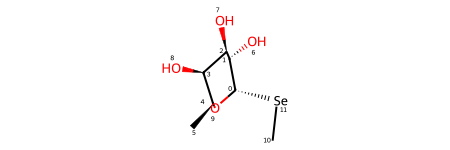

In [85]:
system_structure.resolved_ligand_mols[system_structure.ligand_chain_ordered[0]]

### Ligand conformer coordinates

As you can tell, the input 2D and 3D conformer indices match, but the resolved ligand is different.
Thus to perform a correct comparison for their coordinates one should use atom order stacks.


In [86]:
input_atom_order_stack, holo_atom_order_stack = system_structure.ligand_template2resolved_atom_order_stacks[system_structure.ligand_chain_ordered[0]]
input_atom_order_stack, holo_atom_order_stack

(array([[ 2, 10,  8,  6,  4,  5, 11,  9,  7,  3,  0,  1]]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]]))

In [87]:
system_structure.input_ligand_conformers_coords[system_structure.ligand_chain_ordered[0]][input_atom_order_stack]

array([[[-8.32246364e-01, -5.41422034e-01,  6.95310721e-01],
        [-9.61280066e-02, -1.62418779e+00, -2.58971617e-03],
        [ 1.36365688e+00, -1.29060539e+00, -8.72518051e-02],
        [ 1.65586502e+00,  1.44224780e-01, -2.81915007e-01],
        [ 5.19429961e-01,  1.07165352e+00, -3.06107763e-01],
        [ 9.64640937e-01,  2.38734569e+00,  3.55896266e-01],
        [-6.76487851e-01, -1.87751934e+00, -1.23675539e+00],
        [ 1.96517761e+00, -1.80232008e+00,  1.08687714e+00],
        [ 2.58306216e+00,  5.33170197e-01,  7.13728813e-01],
        [-6.37999839e-01,  7.13567855e-01,  2.76032171e-01],
        [-3.69851856e+00,  5.39740535e-01, -2.75985663e-01],
        [-2.75082421e+00, -9.41947345e-01,  5.22679063e-01]]])

In [88]:
system_structure.resolved_ligand_mols_coords[system_structure.ligand_chain_ordered[0]][holo_atom_order_stack]

array([[[48.954, 28.186, 62.068],
        [48.681, 29.643, 61.777],
        [48.556, 29.933, 60.282],
        [47.499, 28.988, 59.699],
        [47.948, 27.56 , 59.939],
        [46.992, 26.503, 59.374],
        [49.72 , 30.41 , 62.383],
        [48.255, 31.352, 60.148],
        [46.262, 29.193, 60.366],
        [48.031, 27.383, 61.339],
        [50.647, 25.895, 62.426],
        [50.853, 27.716, 61.696]]])

## Protein

In [90]:
for name in system_structure.get_properties():
    if "protein" in name:
        print(name)

protein_backbone_mask
protein_calpha_coords
protein_calpha_mask
protein_chain_ordered
protein_chains
protein_coords
protein_n_atoms
protein_sequence_from_structure
protein_structure_b_factor
protein_structure_tokenized_sequence
protein_unique_atom_names
protein_unique_residue_ids
protein_unique_residue_names


### Masking
The properties `protein_backbone_mask` and `protein_calpha_mask` are boolean masks that can be used to select backbone or calpha atoms from biotite `AtomArray`. The indices of `True` corresponds to backbone or calpha indices.

In [91]:
print(
    "Total number of atoms:",
    len(system_structure.protein_atom_array),
)
print(
    "Number of backbone atoms:",
    system_structure.protein_backbone_mask.sum()
)
print(
    "Number of calpha atoms:",
    system_structure.protein_calpha_mask.sum(),
)

Total number of atoms: 2443
Number of backbone atoms: 942
Number of calpha atoms: 314


In [92]:
calpha_atom_array = system_structure.protein_atom_array[system_structure.protein_calpha_mask]
calpha_atom_array.coord.shape


(314, 3)

You can also filter by arbitrary properties of the `AtomArray` using the `filter` method. This returns a new `Structure` object.

In [93]:
calpha_structure = system_structure.filter(
    property="atom_name",
    mask="CA",
)

2024-09-23 17:29:59,558 | plinder.core.structure.atoms:127 | WARNING : generate_conformer: MMFFOptimizeMolecule - the forcefield could not be set up


In [94]:
calpha_structure.protein_atom_array.coord.shape

(314, 3)

## Linked protein input structures

For realistic inference scenarios we need to initialize our protein structures using a linked structure (introduced above). In many structures the residue numbering varies, thus we do need to ensure correct residues and atom mapping.

In [95]:
#TODO:

#TODO: visuals?

# Datasets and Dataloaders

#### Interacting with the PLINDER dataset
`PlinderDataset` provides an interface to interact with _PLINDER_ data as a dataset. It is a subclass of `torch.utils.data.Dataset`, as such subclassing it and extending should be familiar to most users. Flexibility and general applicability is our top concern when designing this interface and `PlinderDataset` allows users to not only define their own split but to also bring their own featurizer.
It can be initialized with the following parameters
```
Parameters
    ----------
    df : pd.DataFrame | None
        the split to use
    split : str
        the split to sample from
    split_parquet_path : str | Path, default=None
        split parquet file
    input_structure_priority : str, default="apo"
        Which alternate structure to proritize
    featurizer: Callable[
            [Structure, int], dict[str, torch.Tensor]
    ] = structure_featurizer,
        Transformation to turn structure to input tensors
    padding_value : int
        Value for padding uneven array
    **kwargs : Any
        Any other keyword args
```

In [96]:
from plinder.core.loader.dataset import PlinderDataset, get_torch_loader

This is where you may want to load a `train` dataset, but for the purposes of demonstration - we will start with `val` due to smaller memory footprint.

In [97]:
val_dataset = PlinderDataset(split="val",
                               filters=[("system_num_protein_chains", "==", 1)])

In [98]:
val_dataset[2]

{'system_id': '7h3v__2__1.B__1.G',
 'holo_structure': Structure(
     (
         'id',
         '7h3v__2__1.B__1.G',
     ),
     (
         'protein_path',
         /content/plinder/2024-06/v2/systems/7h3v__2__1.B__1.G/receptor.cif,
     ),
     (
         'protein_sequence',
         {
             '1.B': 'QEQTGGSGAIYVGNYRVVNRHLATHNDWANLVWEDSSRDLLVSSTTAQGCDTIARCDCQTGVYYCSSRRKHYPVSFSKPSLIFVEASEYYPARYQSHLMLAVGHSEPGDCGGILRCQHGVVGIVSTGGNGLVGFADVRDLLWLDEEAMEQ',
         },
     ),
     (
         'ligand_sdfs',
         {
             '1.G': '/content/plinder/2024-06/v2/systems/7h3v__2__1.B__1.G/ligand_files/1.G.sdf',
         },
     ),
     (
         'ligand_smiles',
         {
             '1.G': 'COc1ccccc1-c1nnco1',
         },
     ),
     (
         'protein_atom_array',
         <class 'biotite.structure.AtomArray'> with shape (1083,),
     ),
     (
         'ligand_mols',
         {
             '1.G': (
                 (
                     <class 'numpy.ndarray'> with shape

In [99]:
val_loader = get_torch_loader(
    val_dataset
)

In [100]:
for data in val_loader:
    test_torch = data
    break

2024-09-23 17:37:19,823 | plinder.core.structure.atoms:207 | WARNING : get_template_to_mol_matches: could not match template fully - retry with unmatched bonds set as UNSPECIFIED
2024-09-23 17:37:20,700 | plinder.core.structure.atoms:133 | WARNING : generate_conformer: EmbedMolecule - failed, try using useBasicKnowledge=False
2024-09-23 17:37:22,334 | plinder.core.structure.atoms:207 | WARNING : get_template_to_mol_matches: could not match template fully - retry with unmatched bonds set as UNSPECIFIED


# Evaluation

## `plinder_eval`

We provide a wrapper around the OpenStructure scorer as well as PoseBusters to make it easy to evaluate predictions against PLINDER systems and generate scores for the leaderboard.


This can be accessed through the command-line tool `plinder_eval`





In [101]:
!plinder_eval --help

usage: 
    Evaluate a set of docking/cofolding predictions against a set of reference Plinder systems.
    

options:
  -h, --help            show this help message and exit
  --prediction_file PREDICTION_FILE
                        Path to prediction file with [id, reference_system_id, receptor_file,
                        ligand_file, rank, confidence] as columns
  --output_dir OUTPUT_DIR
                        Path to output folder where score JSON files are saved
  --num_processes NUM_PROCESSES
                        Number of processes to use
  --overwrite           Overwrite max similarity files
  --posebusters         Run posebuster scoring
  --flexible            Run protein scoring, for flexible docking and cofolding
  --posebusters_full    Run posebuster scoring and return full report


This expects a CSV file with each row representating a protein-ligand pose, and the following columns:

- `id`: An identifier for the prediction (same across different ranked poses of the same prediction)
- `reference_system_id`: `plinder` system ID to use as reference
- `receptor_file`: Path to predicted receptor CIF file. Leave blank if rigid docking, the system's receptor file will be used.
- `rank`: The rank of the predicted pose (1-indexed)
- `ligand_file`: Path to the SDF file of the predicted pose

And produces a `scores.parquet` file with evaluated metrics for all the poses.

For individual systems you can also use the Python function `plinder.eval.docking.write_scores.evaluate`

For example, here's how one could use AutoDock Vina to generate some docked poses from one of the apo/pred structures and then evaluate them:

In [102]:
from biotite.structure import centroid, from_template
import numpy as np
from biotite.application.autodock import VinaApp
from biotite.structure.io import load_structure
from biotite.structure.io.mol import MOLFile, SDFile
from rdkit import Chem
from pathlib import Path
from plinder.core import PlinderSystem
import tempfile


def vina(
    ligand,
    receptor,
    pocket_center,
    output_folder: Path,
    size=10,
    max_num_poses=5
):
    app = VinaApp(
        ligand,
        receptor,
        center=pocket_center,
        size=[size, size, size],
    )
    app.set_max_number_of_models(max_num_poses)
    app.start()
    app.join()
    docked_ligand = from_template(ligand, app.get_ligand_coord())
    docked_ligand = docked_ligand[..., ~np.isnan(docked_ligand.coord[0]).any(axis=-1)]
    output_files = []
    for i in range(docked_ligand.shape[0]):
        sdf_file = MOLFile()
        sdf_file.set_structure(docked_ligand[i])
        output_file = output_folder / f"docked_ligand_{i}.sdf"
        sdf_file.write(output_file)
        output_files.append(output_file)
    return output_files

def input_ligand_conformer_biotite(self):
      """dict[str, AtomArray]: The coordinates of the input 3D conformer generated from input SMILES"""
      ligands = {}
      for c in self.input_ligand_conformers:
          with tempfile.NamedTemporaryFile(suffix=".sdf") as tmp_file:
              Chem.SDWriter(tmp_file.name).write(self.input_ligand_conformers[c])
              ligands[c] = SDFile.read(tmp_file.name).record.get_structure()
      return ligands

In [103]:
from plinder.core.scores import query_index

In [104]:
val_set = query_index(splits=["val"], filters=[("system_num_ligand_chains", "==", 1), ("system_num_protein_chains", "==", 1)])

In [105]:
val_set

system_id entry_pdb_id split
0    4cj6__1__1.A__1.B         4cj6   val
1    3cj9__1__1.A__1.D         3cj9   val
2    7da6__1__1.A__1.B         7da6   val
3    5dyw__1__1.A__1.E         5dyw   val
4    3bxm__1__2.A__2.C         3bxm   val
..                 ...          ...   ...
395  2vck__1__1.A__1.E         2vck   val
396  2vck__2__1.B__1.F         2vck   val
397  4k42__1__1.A__1.G         4k42   val
398  3elb__1__1.A__1.B         3elb   val
399  3elb__2__2.A__2.B         3elb   val

[400 rows x 3 columns]

In [106]:
from plinder.core import PlinderSystem

plinder_system = PlinderSystem(system_id="4cj6__1__1.A__1.B")

In [107]:
apo_structures = plinder_system.alternate_structures

In [108]:
apo_structures.keys()

dict_keys(['P12271_A'])

In [109]:
apo_structure = apo_structures["P12271_A"]

In [110]:
input_protein = load_structure(apo_structure.protein_path, include_bonds=True, use_author_fields=False, model=1)
input_ligand_conformers = input_ligand_conformer_biotite(plinder_system.holo_structure)
input_ligand = input_ligand_conformers[plinder_system.holo_structure.ligand_chain_ordered[0]]

In [111]:
input_ligand.shape

(21,)

### Example: vina

In [ ]:
!mamba install -q vina

In [ ]:
output_folder = Path("test_output")
output_folder.mkdir(exist_ok=True)
docking_poses = vina(
    ligand=input_ligand,
    receptor=input_protein,
    pocket_center=centroid(input_protein),
    output_folder=output_folder,
    max_num_poses=5,
    size=20
)

/usr/local/lib/python3.10/site-packages/biotite/structure/io/pdbqt/file.py:403: UserWarning: A charge array was neither given as optional argument, nor does a charge annotation of the inserted AtomArray exist. Therefore, all atoms' formal charge is assumed to be zero.
  charges = partial_charges(atoms)


In [ ]:
from plinder.eval.docking.write_scores import evaluate

In [ ]:
metrics = []
for pose in docking_poses:
    metrics.append(
        evaluate(
            model_system_id=apo_structure.id,
            reference_system_id=plinder_system.system_id,
            receptor_file=apo_structure.protein_path,
            ligand_files=[pose],
            flexible=False,
            posebusters=False,
            posebusters_full=False,
        )
    )

In [ ]:
import pandas as pd
metrics_df = pd.DataFrame(metrics)
metrics_df


model          reference  num_reference_ligands  num_model_ligands  \
0  P12271_A  4cj6__1__1.A__1.B                      1                  1   
1  P12271_A  4cj6__1__1.A__1.B                      1                  1   
2  P12271_A  4cj6__1__1.A__1.B                      1                  1   
3  P12271_A  4cj6__1__1.A__1.B                      1                  1   

   num_reference_proteins  num_model_proteins  \
0                       1                   1   
1                       1                   1   
2                       1                   1   
3                       1                   1   

   fraction_reference_ligands_mapped  fraction_model_ligands_mapped  \
0                                1.0                            1.0   
1                                1.0                            1.0   
2                                1.0                            1.0   
3                                1.0                            1.0   

   lddt_pli_ave  lddt_pli_wave  lddt_lp_ave  lddt_lp_wave  bisy_rmsd_ave  \
0      0.085754       0.085754          1.0           1.0      15.588256   
1      0.082696       0.082696          1.0           1.0      12.258589   
2      0.063703       0.063703          1.0           1.0      16.007225   
3      0.104795       0.104795          1.0           1.0      15.785239   

   bisy_rmsd_wave  
0       15.588256  
1       12.258589  
2       16.007225  
3       15.785239

In [ ]:
metrics_df[["reference", "lddt_pli_ave", "lddt_lp_ave", "bisy_rmsd_ave"]]

reference  lddt_pli_ave  lddt_lp_ave  bisy_rmsd_ave
0  4cj6__1__1.A__1.B      0.085754          1.0      15.588256
1  4cj6__1__1.A__1.B      0.082696          1.0      12.258589
2  4cj6__1__1.A__1.B      0.063703          1.0      16.007225
3  4cj6__1__1.A__1.B      0.104795          1.0      15.785239

In [ ]:
metrics_full = []
for pose in docking_poses:
    metrics_full.append(
        evaluate(
            model_system_id=apo_structure.id,
            reference_system_id=plinder_system.system_id,
            receptor_file=apo_structure.protein_path,
            ligand_files=[pose],
            flexible=True,
            posebusters=True,
            posebusters_full=False,
        )
    )

[10:19:12] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:19:15] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:19:17] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:19:19] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


In [ ]:
metrics_full = metrics[4:]

In [ ]:
metrics_df = pd.DataFrame(metrics_full)

In [ ]:
metrics_df[["reference", "lddt", "bb_lddt", 'per_chain_lddt_ave', 'per_chain_bb_lddt_ave', "lddt_pli_ave", "lddt_lp_ave", "bisy_rmsd_ave"]]

reference  lddt  bb_lddt  per_chain_lddt_ave  \
0  4cj6__1__1.A__1.B   1.0      1.0                 1.0   
1  4cj6__1__1.A__1.B   1.0      1.0                 1.0   
2  4cj6__1__1.A__1.B   1.0      1.0                 1.0   
3  4cj6__1__1.A__1.B   1.0      1.0                 1.0   

   per_chain_bb_lddt_ave  lddt_pli_ave  lddt_lp_ave  bisy_rmsd_ave  
0                    1.0      0.085754          1.0      15.588256  
1                    1.0      0.082696          1.0      12.258589  
2                    1.0      0.063703          1.0      16.007225  
3                    1.0      0.104795          1.0      15.785239

In [ ]:
metrics_df[[c for c in metrics_df.columns if c.startswith("posebusters")]]

posebusters_mol_pred_loaded  posebusters_mol_cond_loaded  \
0                          1.0                          1.0   
1                          1.0                          1.0   
2                          1.0                          1.0   
3                          1.0                          1.0   

   posebusters_sanitization  posebusters_inchi_convertible  \
0                       1.0                            1.0   
1                       1.0                            1.0   
2                       1.0                            1.0   
3                       1.0                            1.0   

   posebusters_all_atoms_connected  posebusters_bond_lengths  \
0                              1.0                       1.0   
1                              1.0                       1.0   
2                              1.0                       1.0   
3                              1.0                       1.0   

   posebusters_bond_angles  posebusters_internal_steric_clash  \
0                      1.0                                1.0   
1                      1.0                                1.0   
2                      1.0                                1.0   
3                      1.0                                1.0   

   posebusters_aromatic_ring_flatness  posebusters_double_bond_flatness  \
0                                 1.0                               1.0   
1                                 1.0                               1.0   
2                                 1.0                               1.0   
3                                 1.0                               1.0   

   posebusters_internal_energy  posebusters_protein-ligand_maximum_distance  \
0                          1.0                                          1.0   
1                          0.0                                          1.0   
2                          1.0                                          1.0   
3                          1.0                                          1.0   

   posebusters_minimum_distance_to_protein  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   

   posebusters_minimum_distance_to_organic_cofactors  \
0                                                1.0   
1                                                1.0   
2                                                1.0   
3                                                1.0   

   posebusters_minimum_distance_to_inorganic_cofactors  \
0                                                1.0     
1                                                1.0     
2                                                1.0     
3                                                1.0     

   posebusters_minimum_distance_to_waters  \
0                                     1.0   
1                                     1.0   
2                                     1.0   
3                                     1.0   

   posebusters_volume_overlap_with_protein  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   

   posebusters_volume_overlap_with_organic_cofactors  \
0                                                1.0   
1                                                1.0   
2                                                1.0   
3                                                1.0   

   posebusters_volume_overlap_with_inorganic_cofactors  \
0                                                1.0     
1                                                1.0     
2                                                1.0     
3                                                1.0     

   posebusters_volume_overlap_with_waters  
0                                     1.0  
1                                    

In [ ]:
view = py3Dmol.view()
view.setBackgroundColor('white')

view.setStyle({'stick': {'color':'green'}})
view.addModel(open(apo_structure.protein_path, 'r').read(),'cif')
view.setStyle({'chain':'A'}, {'cartoon': {'color':'blue'}})
view.addModel(open(docking_poses[-1], 'r').read(), 'sdf')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
view = py3Dmol.view()
view.setBackgroundColor('white')
view.addModel(open(plinder_system.system_cif, 'r').read(),'cif')
view.setStyle({'chain':plinder_system.holo_structure.protein_chain_ordered[0]}, {'cartoon': {'color':'purple'}})
view.setStyle({'chain':plinder_system.holo_structure.ligand_chain_ordered[0]}, {'stick': {'color':'green'}})
view.zoomTo()
view.show()

[10:29:23] Molecule does not have explicit Hs. Consider calling AddHs()
[10:29:23] Molecule does not have explicit Hs. Consider calling AddHs()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## `plinder_stratify`

TODO:

## `plinder_plot`

# MLSB leaderboard checklist (TL;DR)

Assuming a single-ligand single-protein flexible pocket docking model

1. Get relevant train and val systems
e.g.

```python
train_systems = set(query_index(filters=[("system_num_ligand_chains", "==", 1),
 ("system_num_protein_chains", "==", 1)], splits=["train"])["system_id"])
val_systems = set(query_index(filters=[("system_num_ligand_chains", "==", 1),
 ("system_num_protein_chains", "==", 1)], splits=["val"])["system_id"])
 ```

 2. Train your model.
 - Make sure to only use apo/pred structures linked to the respective systems and not leak any val set systems into train.
 - If you have a pocket prediction component, make sure you're not leaking any info about the pocket from the ground truth protein or ligand. Use input conformers instead.
 - Evaluate model performance on the val set, both while monitoring training for early stopping and hyperparameter optimization etc. as well as using the full evaluation harness for some checkpoints, to ensure that you are predicting complexes with good poses, physics, pockets, interactions and global proteins.
 - Plot val set performance as a function of similarity to the training set to see if your model has some inductive biases.

 3. Expose a predict.py function and upload your model to HuggingFace for everyone to use! (next session)